In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [6]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [7]:
df_profiles.sample()

danceability    energy       key  \
0327a983748921d193b5073238b691353aeec66d      0.460066  0.667912  0.511755   

                                          loudness      mode  speechiness  \
0327a983748921d193b5073238b691353aeec66d  0.824763  0.727011     0.067542   

                                          acousticness  instrumentalness  \
0327a983748921d193b5073238b691353aeec66d       0.28285          0.116931   

                                          liveness   valence     tempo  \
0327a983748921d193b5073238b691353aeec66d  0.205218  0.429209  0.518961   

                                          time_signature  
0327a983748921d193b5073238b691353aeec66d        0.778161

## **Процес кластеризації**

In [8]:
from sklearn.cluster import KMeans

Спробуємо дізнатися оптимальне значення змінної k за допомогою методу "ліктя", що полягає в підборі значень змінної та відображенні їх на графіку та подальший пошук точки, в якій спадання перестає бути дуже різким

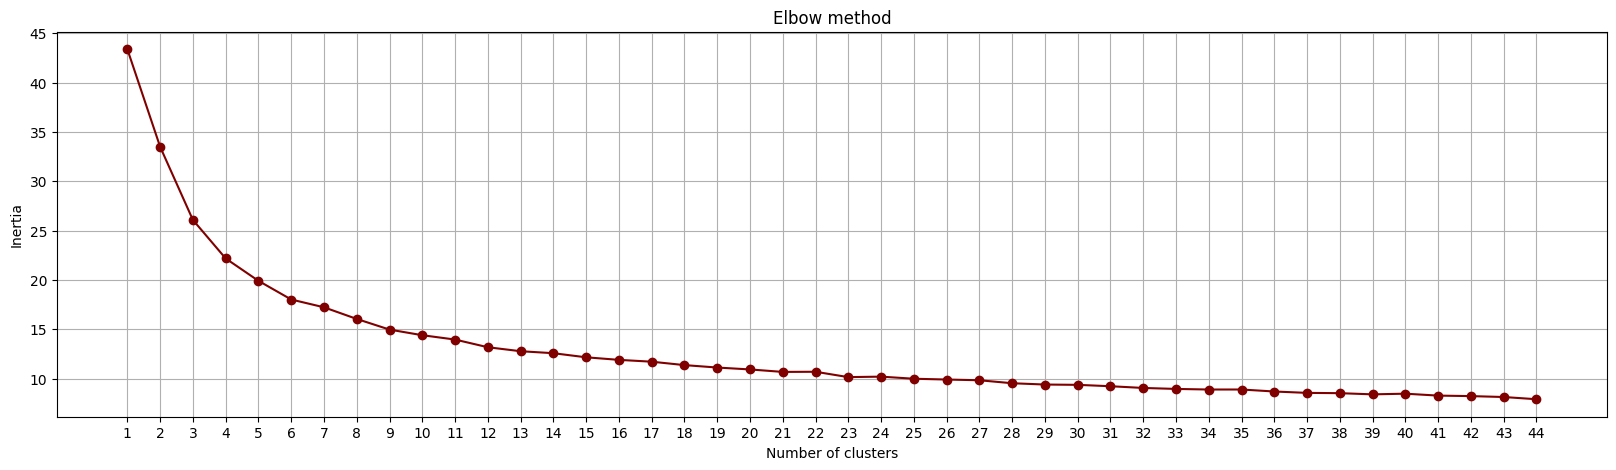

In [9]:
data = list(df_profiles.values)
inertias = []

for i in range(1,45):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(20,5))
plt.plot(range(1,45), inertias, marker='o', color='maroon')
plt.xticks(ticks=(range(1,45)))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### З графіка видно, що сильний спад закінчується після k=4 або k=5

для того, щоб не втратити важливу інформацію при аналізі, створимо копію основного датасету

In [10]:
df_clusters = df_profiles.copy()

імпортуємо PCA з бібліотеки sklearn. PCA (Principal component analysis) - це метод головних компонент, який використаємо для підготовки даних до кластеризації, шляхом зменшення розмірності даних, та відображення кластерів на координатній площині

In [11]:
from sklearn.decomposition import PCA

In [12]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [13]:
for i in range (2, 20):
  kmeans = KMeans(n_clusters=i, random_state=0)
  df_clusters[f'cluster_k_{i}'] = kmeans.fit_predict(df_clusters[features].values)

In [14]:
df_clusters.sample()

danceability    energy       key  \
6394988c9bdc105edd446e6695fc135b3a298dab      0.503609  0.551382  0.468499   

                                          loudness      mode  speechiness  \
6394988c9bdc105edd446e6695fc135b3a298dab  0.790125  0.725581      0.04837   

                                          acousticness  instrumentalness  \
6394988c9bdc105edd446e6695fc135b3a298dab       0.37331          0.231783   

                                          liveness  valence  ...  \
6394988c9bdc105edd446e6695fc135b3a298dab  0.194035  0.38901  ...   

                                          cluster_k_10  cluster_k_11  \
6394988c9bdc105edd446e6695fc135b3a298dab             0             0   

                                          cluster_k_12  cluster_k_13  \
6394988c9bdc105edd446e6695fc135b3a298dab             0             0   

                                          cluster_k_14  cluster_k_15  \
6394988c9bdc105edd446e6695fc135b3a298dab             0            13   

                                          cluster_k_16  cluster_k_17  \
6394988c9bdc105edd446e6695fc135b3a298dab            13            13   

                                          cluster_k_18  cluster_k_19  
6394988c9bdc105edd446e6695fc135b3a298dab            16            13  

[1 rows x 30 columns]

In [15]:
clusters = ['cluster_k_2', 'cluster_k_3', 'cluster_k_4', 'cluster_k_5', 'cluster_k_6', 'cluster_k_7',
            'cluster_k_8', 'cluster_k_9', 'cluster_k_10', 'cluster_k_11', 'cluster_k_12', 'cluster_k_13',
            'cluster_k_14', 'cluster_k_15', 'cluster_k_16', 'cluster_k_17', 'cluster_k_18', 'cluster_k_19']

In [16]:
[i for i in range(2, 20)]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [17]:
len(clusters)

18

In [18]:
rows = len(clusters) // 3
columns = len(clusters) // 6

rows, columns

(6, 3)

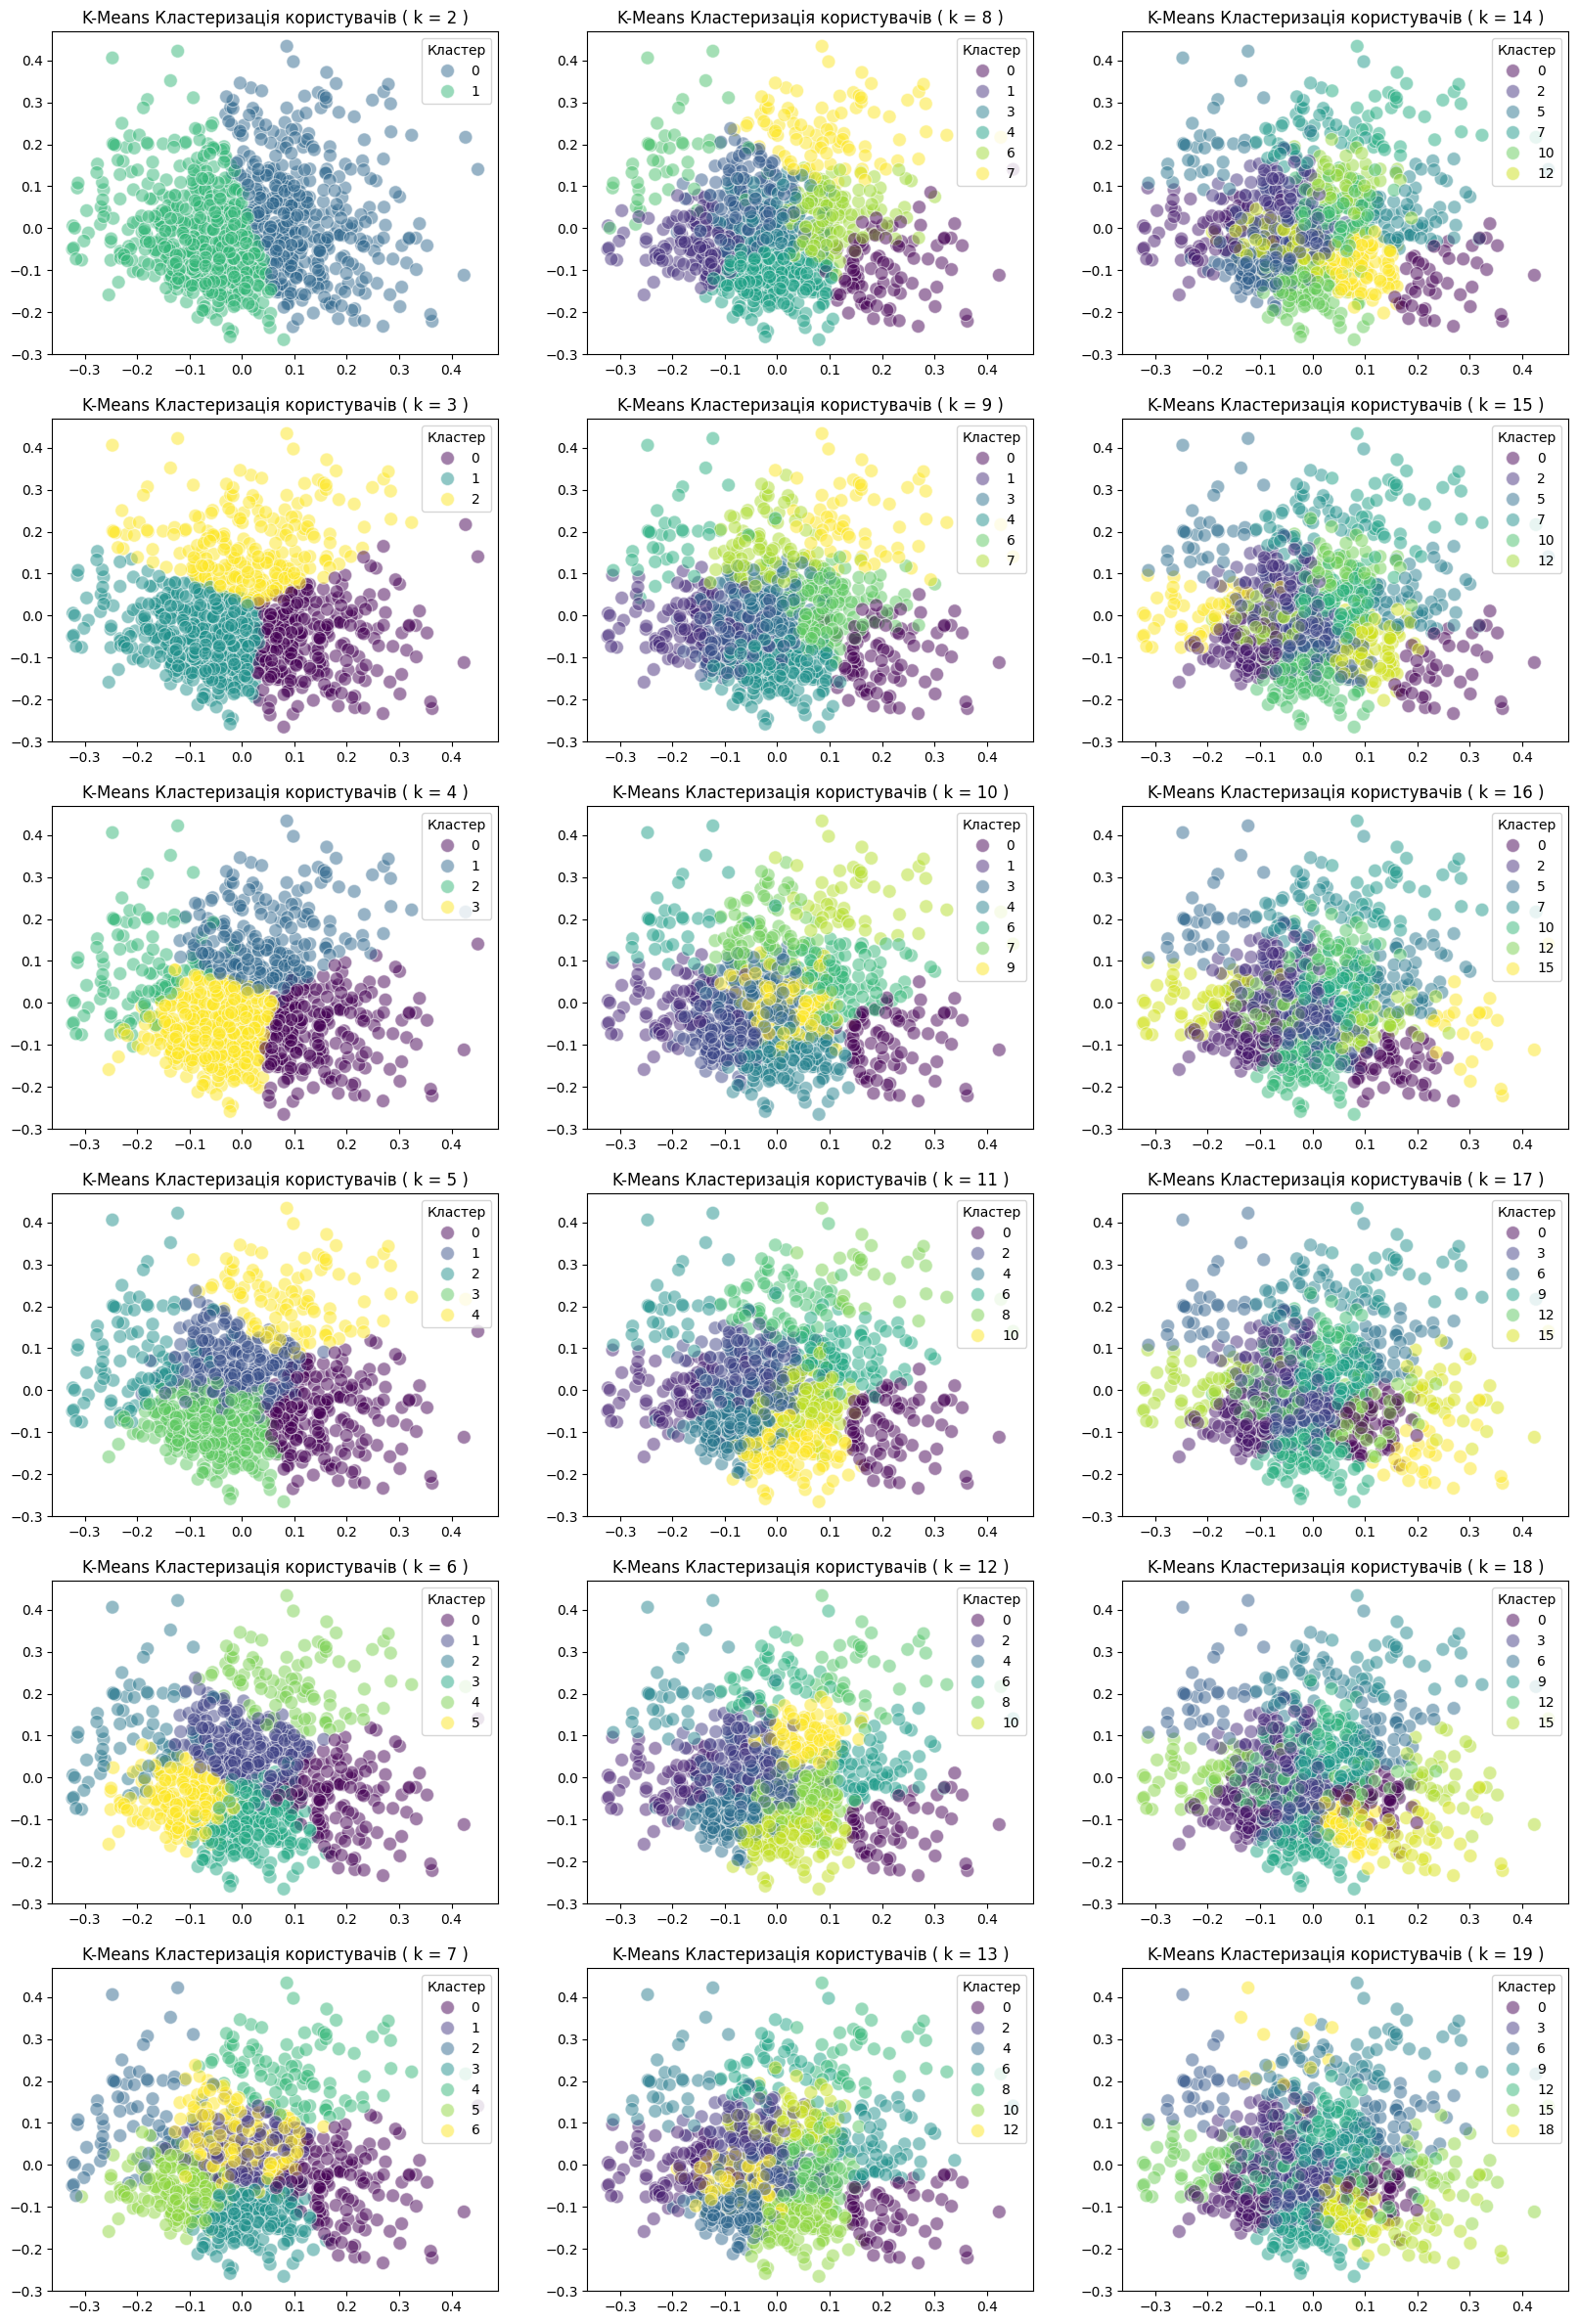

In [20]:
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20, 30))

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clusters[features].select_dtypes(include=['float64', 'int64']))
pca_x = df_pca[:, 0]
pca_y = df_pca[:, 1]

for ind, cluster in enumerate(clusters):
  i = ind % 6
  j = ind // 6

  sns.scatterplot(ax=axes[i, j], x=pca_x, y=pca_y, hue=df_clusters[cluster], palette='viridis', s=100, alpha=0.5)

  axes[i, j].set_title(f'K-Means Кластеризація користувачів ( k = {cluster.split("_")[-1]} )')
  axes[i, j].legend(title='Кластер')

plt.show()

## **Відобразимо на 3d площині**

In [22]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_clusters[features].select_dtypes(include=['float64', 'int64']))

pca_x = df_pca[:, 0]
pca_y = df_pca[:, 1]
pca_z = df_pca[:, 2]

In [23]:
def plot_cluster_3d(cluster_column):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(pca_x, pca_y, pca_z, c=df_clusters[cluster_column], cmap='viridis', s=60, alpha=0.6)

  ax.set_xlabel('PCA 1')
  ax.set_ylabel('PCA 2')
  ax.set_zlabel('PCA 3')
  ax.set_title('3D PCA Scatter Plot with Clusters')

  legend_labels = df_clusters[cluster_column].unique()
  legend = ax.legend(*scatter.legend_elements(), title="Cluster")
  ax.add_artist(legend)

  plt.tight_layout()
  plt.show()

In [24]:
clusters_to_show = ['cluster_k_3', 'cluster_k_4', 'cluster_k_5', 'cluster_k_6',]

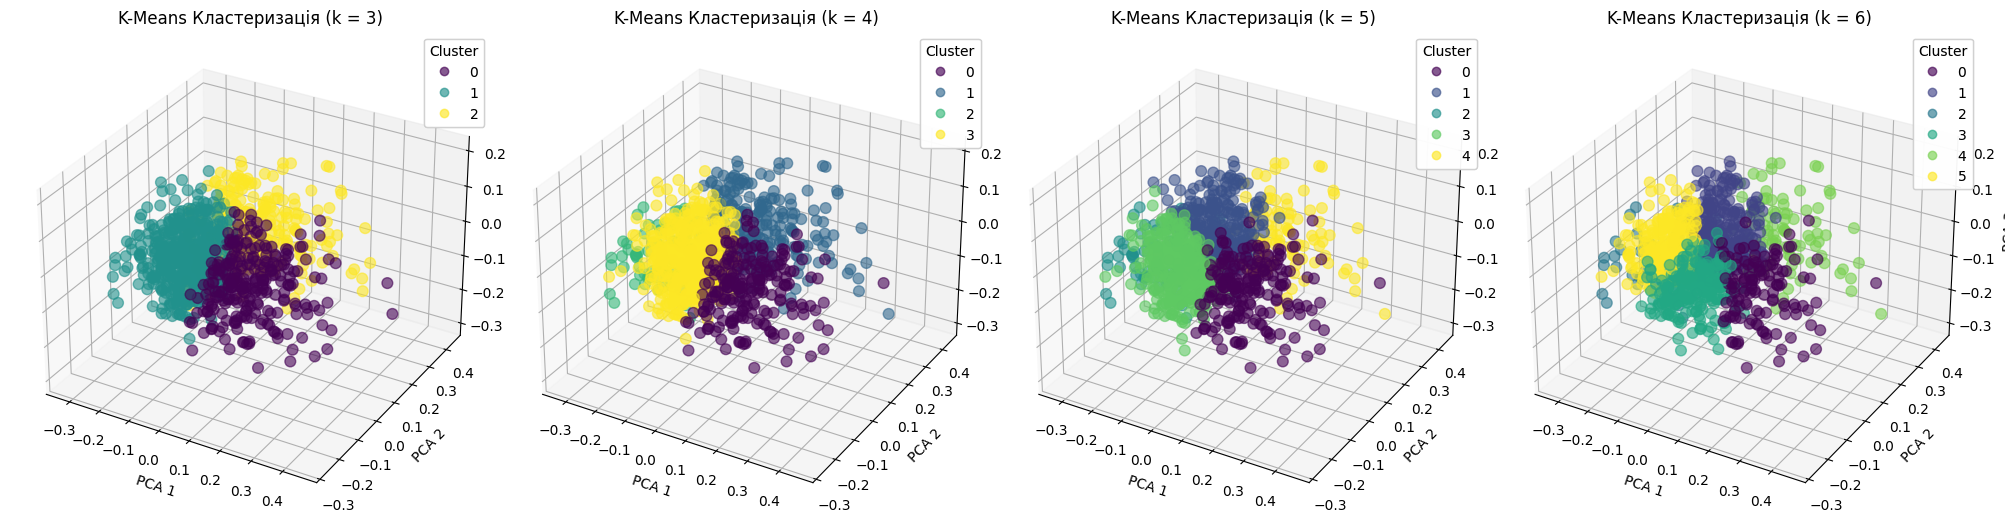

In [25]:
fig = plt.figure(figsize=(20, 7))

for ind, cluster in enumerate(clusters_to_show):
    ax = fig.add_subplot(1, 4, ind + 1, projection='3d')
    scatter = ax.scatter(pca_x, pca_y, pca_z, c=df_clusters[cluster], cmap='viridis', s=60, alpha=0.6)

    ax.set_title(f'K-Means Кластеризація (k = {cluster.split("_")[-1]})')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')

    legend = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend)

plt.tight_layout()
plt.show()

## **Відобразимо на сфері**

In [26]:
from prosphera.projector import Projector

In [28]:
visualizer = Projector(renderer='iframe')

In [1]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

### *k=3*

In [35]:
visualizer.project(
    data=df_clusters.drop(columns='cluster_k_3')[features],
    labels=df_clusters['cluster_k_3']
)

### *k=4*

In [36]:
visualizer.project(
    data=df_clusters.drop(columns='cluster_k_4')[features],
    labels=df_clusters['cluster_k_4']
)

### *k=5*

In [37]:
visualizer.project(
    data=df_clusters.drop(columns='cluster_k_5')[features],
    labels=df_clusters['cluster_k_5']
)

### *k=6*

In [40]:
visualizer.project(
    data=df_clusters.drop(columns='cluster_k_6')[features],
    labels=df_clusters['cluster_k_6']
)

# **Перевіримо розподіл даних на обраних кластеризаціях**

In [41]:
# при k = 3
df_clusters['cluster_k_3'].value_counts(normalize=True)

cluster_k_3
1    0.478
0    0.265
2    0.257
Name: proportion, dtype: float64

In [42]:
# при k = 4
df_clusters['cluster_k_4'].value_counts(normalize=True)

cluster_k_4
3    0.447
1    0.229
0    0.220
2    0.104
Name: proportion, dtype: float64

In [43]:
# при k = 5
df_clusters['cluster_k_5'].value_counts(normalize=True)

cluster_k_5
3    0.346
1    0.256
0    0.203
4    0.102
2    0.093
Name: proportion, dtype: float64

In [44]:
# при k = 6
df_clusters['cluster_k_6'].value_counts(normalize=True)

cluster_k_6
1    0.240
5    0.234
3    0.232
0    0.129
4    0.091
2    0.074
Name: proportion, dtype: float64

# **Припустимо, що оптимальна кількість кластерів = 5**

In [45]:
df_clusters_final = df_clusters[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster_k_5']]

### **функція візуалізації**

In [46]:
def plot_all_features(data: pd.DataFrame,
                      type_of_graph: str = 'hist',
                      ncols: int = 3,
                      figsize: tuple = (20, 15),
                      features=features):

  n_features = len(features)
  nrows = (n_features + ncols - 1) // ncols

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  axes = axes.flatten()

  for i, feature in enumerate(features):
      ax = axes[i]
      col_data = data[feature]

      if type_of_graph == 'bar':
          col_data.value_counts().plot.bar(ax=ax, edgecolor='black', linewidth=1.2, color='maroon')
      else:
          col_data.hist(ax=ax, edgecolor='black', linewidth=1.2, color='maroon')

      ax.set_xlabel(feature)
      ax.set_ylabel('Кількість значень')
      ax.set_title(f'{feature}', fontdict={'weight': 'bold'})

      for patch in ax.patches:
          height = patch.get_height()
          label = f'{height}\n( {height / col_data.shape[0] * 100:.2f}% )'
          x = patch.get_x() + patch.get_width() / 2
          ax.text(x, height + 0.5, label, ha='center', va='bottom', fontsize=8)

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

In [47]:
def plot_features_comparisson(data: pd.DataFrame,
                               cluster_column_name: str = 'cluster_k_5',
                               type_of_graph: str = 'hist',
                               figsize: tuple = (20, 45),
                               features=None):
    if features is None:
        features = data.select_dtypes(include='number').columns.tolist()

    n_clusters = data[cluster_column_name].nunique()
    n_features = len(features)
    total_plots = n_features * n_clusters

    ncols = n_clusters
    nrows = (total_plots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        for j in range(n_clusters):
            plot_index = i * n_clusters + j
            ax = axes[plot_index]

            cluster_data = data[data[cluster_column_name] == j][feature]

            if type_of_graph == 'bar':
                cluster_data.value_counts().plot.bar(ax=ax, edgecolor='black', linewidth=1.2, color='maroon')
            else:
                cluster_data.hist(ax=ax, edgecolor='black', linewidth=1.2, color='maroon', bins=20)

            ax.set_xlabel(feature)
            ax.set_ylabel('Кількість значень')
            ax.set_title(f'{feature} — Кластер {j}', fontdict={'weight': 'bold'}, fontsize=10)

            if type_of_graph == 'bar':
                for patch in ax.patches:
                    height = patch.get_height()
                    if height > 0:
                        label = f'{height}\n({height / cluster_data.shape[0] * 100:.2f}%)'
                        x = patch.get_x() + patch.get_width() / 2
                        ax.text(x, height + 0.5, label, ha='center', va='bottom', fontsize=7)

    for k in range(total_plots, len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.show()

In [48]:
def plot_features_comparisson_overlaping(data: pd.DataFrame,
                                         type_of_graph: str = 'hist',
                                         ncols: int = 3,
                                         cluster_column_name: str = 'cluster_k_5',
                                         figsize: tuple = (20, 15),
                                         features=features):

  if features is None:
      features = data.select_dtypes(include='number').columns.tolist()

  n_clusters = data[cluster_column_name].nunique()
  n_features = len(features)

  nrows = (n_features + ncols - 1) // ncols

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  axes = axes.flatten()

  for i, feature in enumerate(features):
      ax = axes[i]
      col_data_one = data[data[cluster_column_name] == 0][feature]
      col_data_two = data[data[cluster_column_name] == 1][feature]
      col_data_three = data[data[cluster_column_name] == 2][feature]
      col_data_four = data[data[cluster_column_name] == 3][feature]
      col_data_five = data[data[cluster_column_name] == 4][feature]

      colors = ['maroon', 'yellow', 'deepskyblue', 'forestgreen', 'purple']
      if type_of_graph == 'bar':
          col_data_one.value_counts().plot.bar(ax=ax, edgecolor='black', linewidth=1.2, color='maroon')
      else:
          col_data_one.hist(ax=ax, edgecolor='black', linewidth=1.2, color=colors[0], bins=20, alpha=0.2)
          col_data_two.hist(ax=ax, edgecolor='black', linewidth=1.2, color=colors[1], bins=20, alpha=0.2)
          col_data_three.hist(ax=ax, edgecolor='black', linewidth=1.2, color=colors[2], bins=20, alpha=0.2)
          col_data_four.hist(ax=ax, edgecolor='black', linewidth=1.2, color=colors[3], bins=20, alpha=0.2)
          col_data_five.hist(ax=ax, edgecolor='black', linewidth=1.2, color=colors[4], bins=20, alpha=0.2)

      ax.set_xlabel(feature)
      ax.set_ylabel('Кількість значень')
      ax.set_title(f'{feature}', fontdict={'weight': 'bold'})

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

In [49]:
def plot_clusters_overlaping(data: pd.DataFrame,
                            cluster_column_name: str = 'cluster_k_5',
                            figsize: tuple = (20, 15),
                            features=features):

  n_clusters = data[cluster_column_name].nunique()
  clusters = data[cluster_column_name].unique()
  ncols = n_clusters

  n_features = len(features)
  nrows = (n_features + ncols - 1) // ncols

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  axes = axes.flatten()

  for i, cluster in enumerate(clusters):
      ax = axes[i]

      for feature in features:
        col_data = data[data[cluster_column_name] == cluster][feature]
        col_data.hist(ax=ax, edgecolor='black', linewidth=1.2, color='maroon', bins=20, alpha=0.2)

      ax.set_xlabel(cluster)
      ax.set_ylabel('Кількість значень')
      ax.set_title(f'{cluster}', fontdict={'weight': 'bold'})

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

## **Переглянемо перший кластер**

In [50]:
expl_data = df_clusters_final[df_clusters_final['cluster_k_5'] == 0]

In [51]:
expl_data.sample(4)

danceability    energy       key  \
a7c239df341df03edcbdfcead15a37d0938acb42      0.528174  0.525678  0.472322   
15e7692a0539b165bbe0dad78dea78e2ba5fb37f      0.519849  0.616693  0.497427   
f7711402d1f25deab5cd5068125c8617bb13a77e      0.470878  0.564775  0.484438   
b048f21afd5e7467f187bf9f9d413e97c32313a9      0.441535  0.596864  0.456314   

                                          loudness      mode  speechiness  \
a7c239df341df03edcbdfcead15a37d0938acb42  0.785183  0.756432     0.050163   
15e7692a0539b165bbe0dad78dea78e2ba5fb37f  0.804603  0.608919     0.092242   
f7711402d1f25deab5cd5068125c8617bb13a77e  0.797344  0.715254     0.053979   
b048f21afd5e7467f187bf9f9d413e97c32313a9  0.805843  0.778210     0.044260   

                                          acousticness  instrumentalness  \
a7c239df341df03edcbdfcead15a37d0938acb42      0.368936          0.166658   
15e7692a0539b165bbe0dad78dea78e2ba5fb37f      0.323621          0.312894   
f7711402d1f25deab5cd5068125c8617bb13a77e      0.419009          0.082537   
b048f21afd5e7467f187bf9f9d413e97c32313a9      0.255577          0.179735   

                                          liveness   valence     tempo  \
a7c239df341df03edcbdfcead15a37d0938acb42  0.189579  0.443214  0.511068   
15e7692a0539b165bbe0dad78dea78e2ba5fb37f  0.187482  0.434734  0.521407   
f7711402d1f25deab5cd5068125c8617bb13a77e  0.200331  0.424250  0.492117   
b048f21afd5e7467f187bf9f9d413e97c32313a9  0.208657  0.362475  0.528603   

                                          time_signature  cluster_k_5  
a7c239df341df03edcbdfcead15a37d0938acb42        0.779760            0  
15e7692a0539b165bbe0dad78dea78e2ba5fb37f        0.771870            0  
f7711402d1f25deab5cd5068125c8617bb13a77e        0.761356            0  
b048f21afd5e7467f187bf9f9d413e97c32313a9        0.775875            0

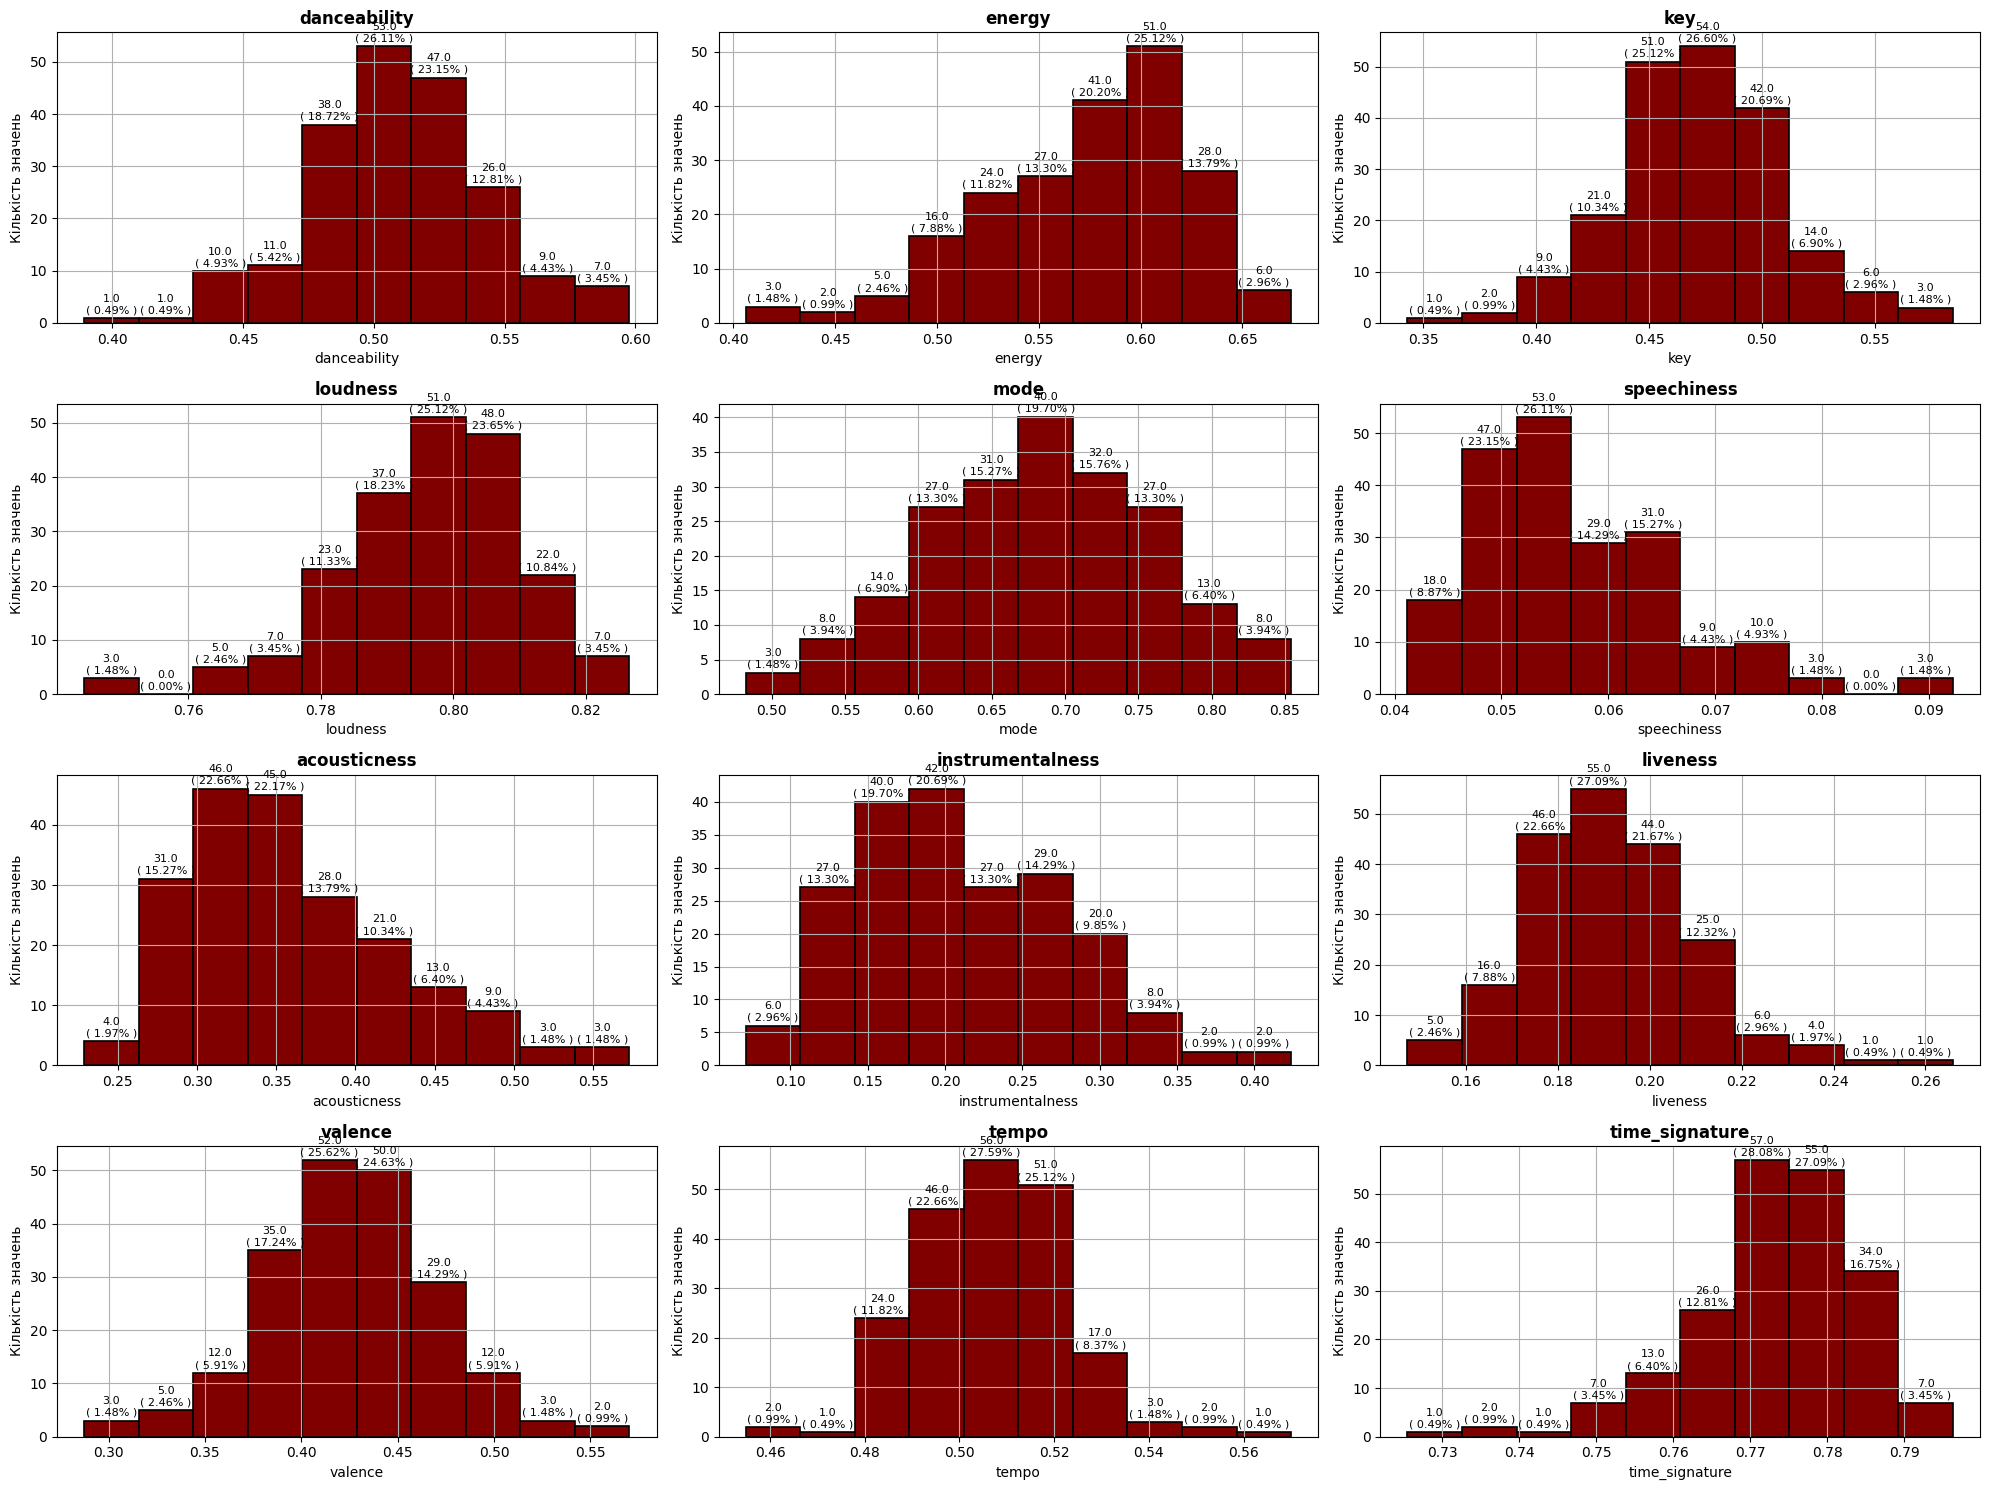

In [52]:
plot_all_features(data=expl_data)

## **Переглянемо другий кластер**

In [53]:
expl_data = df_clusters_final[df_clusters_final['cluster_k_5'] == 1]

In [54]:
expl_data.sample(4)

danceability    energy       key  \
ff0dd3c172a6e27af78bc2a0a64509578496fcf4      0.480317  0.731799  0.485264   
b48c4c12e950f68c55b4d2048541fb81ee5ee3d8      0.498723  0.649964  0.433174   
4307376bfe8916be4c15c32f0b124ee4b4a546f0      0.528070  0.721620  0.507883   
280d66940c6b4b24ef1dcd1dae5686895b9c5f84      0.505160  0.689042  0.478138   

                                          loudness      mode  speechiness  \
ff0dd3c172a6e27af78bc2a0a64509578496fcf4  0.798618  0.598174     0.062927   
b48c4c12e950f68c55b4d2048541fb81ee5ee3d8  0.819662  0.638596     0.059561   
4307376bfe8916be4c15c32f0b124ee4b4a546f0  0.826493  0.575646     0.083279   
280d66940c6b4b24ef1dcd1dae5686895b9c5f84  0.816519  0.608997     0.081096   

                                          acousticness  instrumentalness  \
ff0dd3c172a6e27af78bc2a0a64509578496fcf4      0.191981          0.291715   
b48c4c12e950f68c55b4d2048541fb81ee5ee3d8      0.209702          0.210057   
4307376bfe8916be4c15c32f0b124ee4b4a546f0      0.160624          0.273160   
280d66940c6b4b24ef1dcd1dae5686895b9c5f84      0.219385          0.164545   

                                          liveness   valence     tempo  \
ff0dd3c172a6e27af78bc2a0a64509578496fcf4  0.264714  0.385670  0.532982   
b48c4c12e950f68c55b4d2048541fb81ee5ee3d8  0.200672  0.415994  0.516415   
4307376bfe8916be4c15c32f0b124ee4b4a546f0  0.185716  0.500262  0.533961   
280d66940c6b4b24ef1dcd1dae5686895b9c5f84  0.204909  0.451757  0.502051   

                                          time_signature  cluster_k_5  
ff0dd3c172a6e27af78bc2a0a64509578496fcf4        0.789041            1  
b48c4c12e950f68c55b4d2048541fb81ee5ee3d8        0.776842            1  
4307376bfe8916be4c15c32f0b124ee4b4a546f0        0.780812            1  
280d66940c6b4b24ef1dcd1dae5686895b9c5f84        0.778547            1

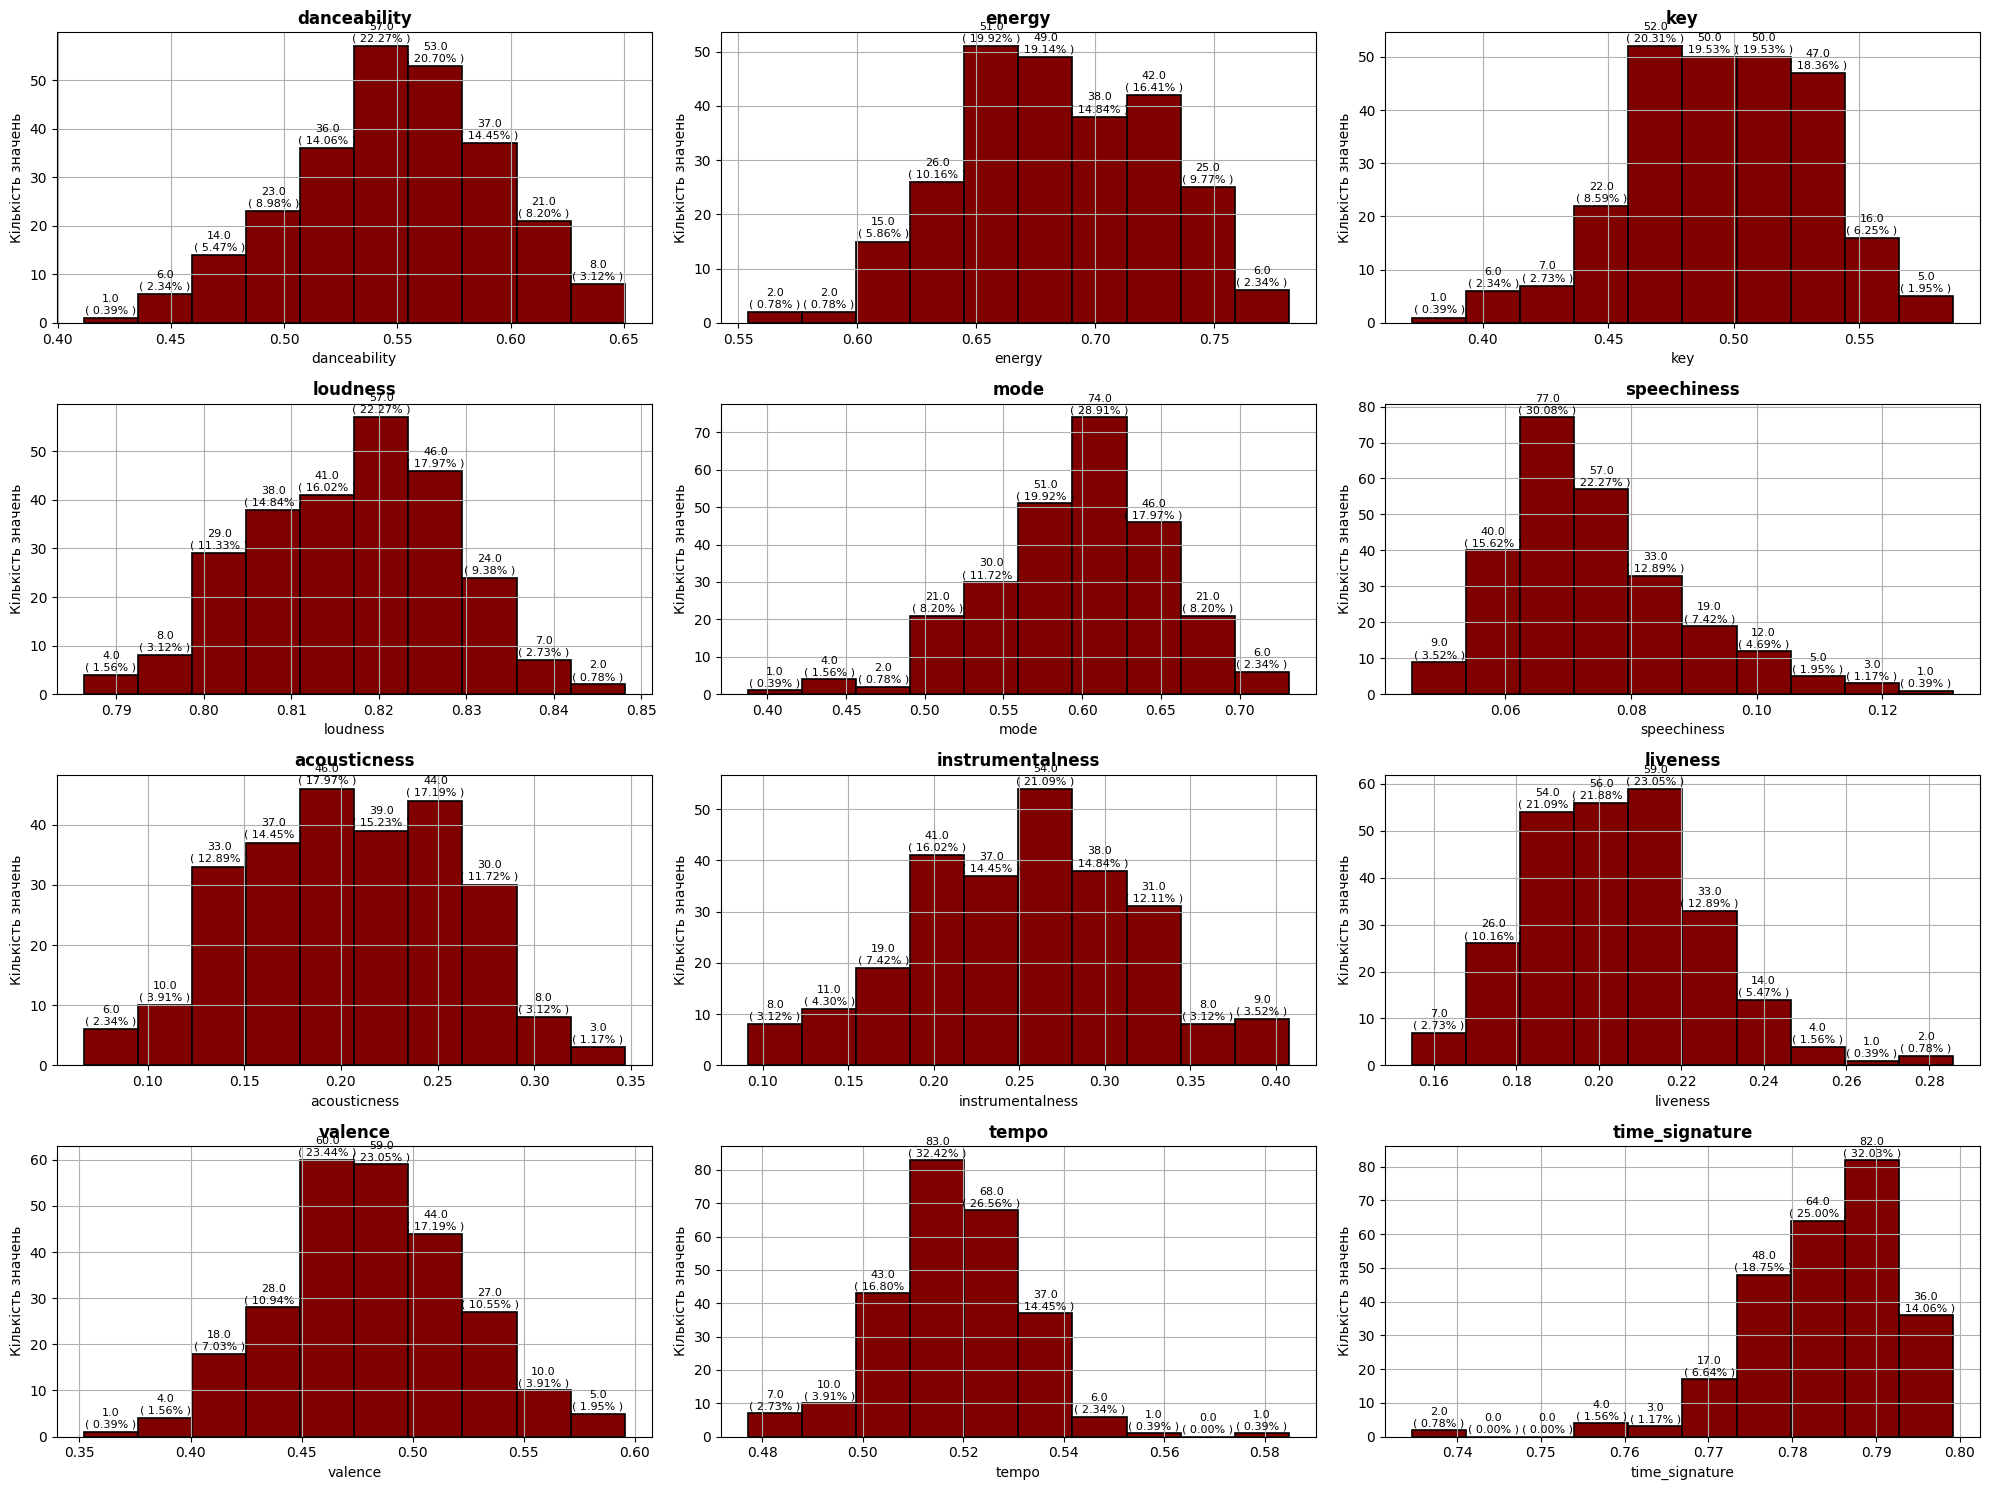

In [55]:
plot_all_features(data=expl_data)

## **Переглянемо третій кластер**

In [56]:
expl_data = df_clusters_final[df_clusters_final['cluster_k_5'] == 2]

In [57]:
expl_data.sample(4)

danceability    energy       key  \
92e759d390c3efe30d66968fca13c3c2e9079c4b      0.484214  0.805101  0.489139   
cf816f2ddcc462856d7df4b0db9e1f17f91e93b5      0.371272  0.889458  0.462250   
00a55d1ba6f63109c208dbd80570520d5d80f563      0.386927  0.859601  0.420622   
45f07a0a7789c77b25568a5ceb1d7835599b6b00      0.412980  0.764704  0.437818   

                                          loudness      mode  speechiness  \
92e759d390c3efe30d66968fca13c3c2e9079c4b  0.843646  0.592920     0.069509   
cf816f2ddcc462856d7df4b0db9e1f17f91e93b5  0.861964  0.738230     0.098519   
00a55d1ba6f63109c208dbd80570520d5d80f563  0.857333  0.546645     0.097009   
45f07a0a7789c77b25568a5ceb1d7835599b6b00  0.824704  0.632000     0.091462   

                                          acousticness  instrumentalness  \
92e759d390c3efe30d66968fca13c3c2e9079c4b      0.111936          0.186382   
cf816f2ddcc462856d7df4b0db9e1f17f91e93b5      0.013674          0.126140   
00a55d1ba6f63109c208dbd80570520d5d80f563      0.083761          0.112541   
45f07a0a7789c77b25568a5ceb1d7835599b6b00      0.162275          0.403832   

                                          liveness   valence     tempo  \
92e759d390c3efe30d66968fca13c3c2e9079c4b  0.224576  0.508133  0.583762   
cf816f2ddcc462856d7df4b0db9e1f17f91e93b5  0.204070  0.349475  0.553654   
00a55d1ba6f63109c208dbd80570520d5d80f563  0.255948  0.274355  0.551523   
45f07a0a7789c77b25568a5ceb1d7835599b6b00  0.208385  0.308584  0.527877   

                                          time_signature  cluster_k_5  
92e759d390c3efe30d66968fca13c3c2e9079c4b        0.788201            2  
cf816f2ddcc462856d7df4b0db9e1f17f91e93b5        0.772881            2  
00a55d1ba6f63109c208dbd80570520d5d80f563        0.778396            2  
45f07a0a7789c77b25568a5ceb1d7835599b6b00        0.740000            2

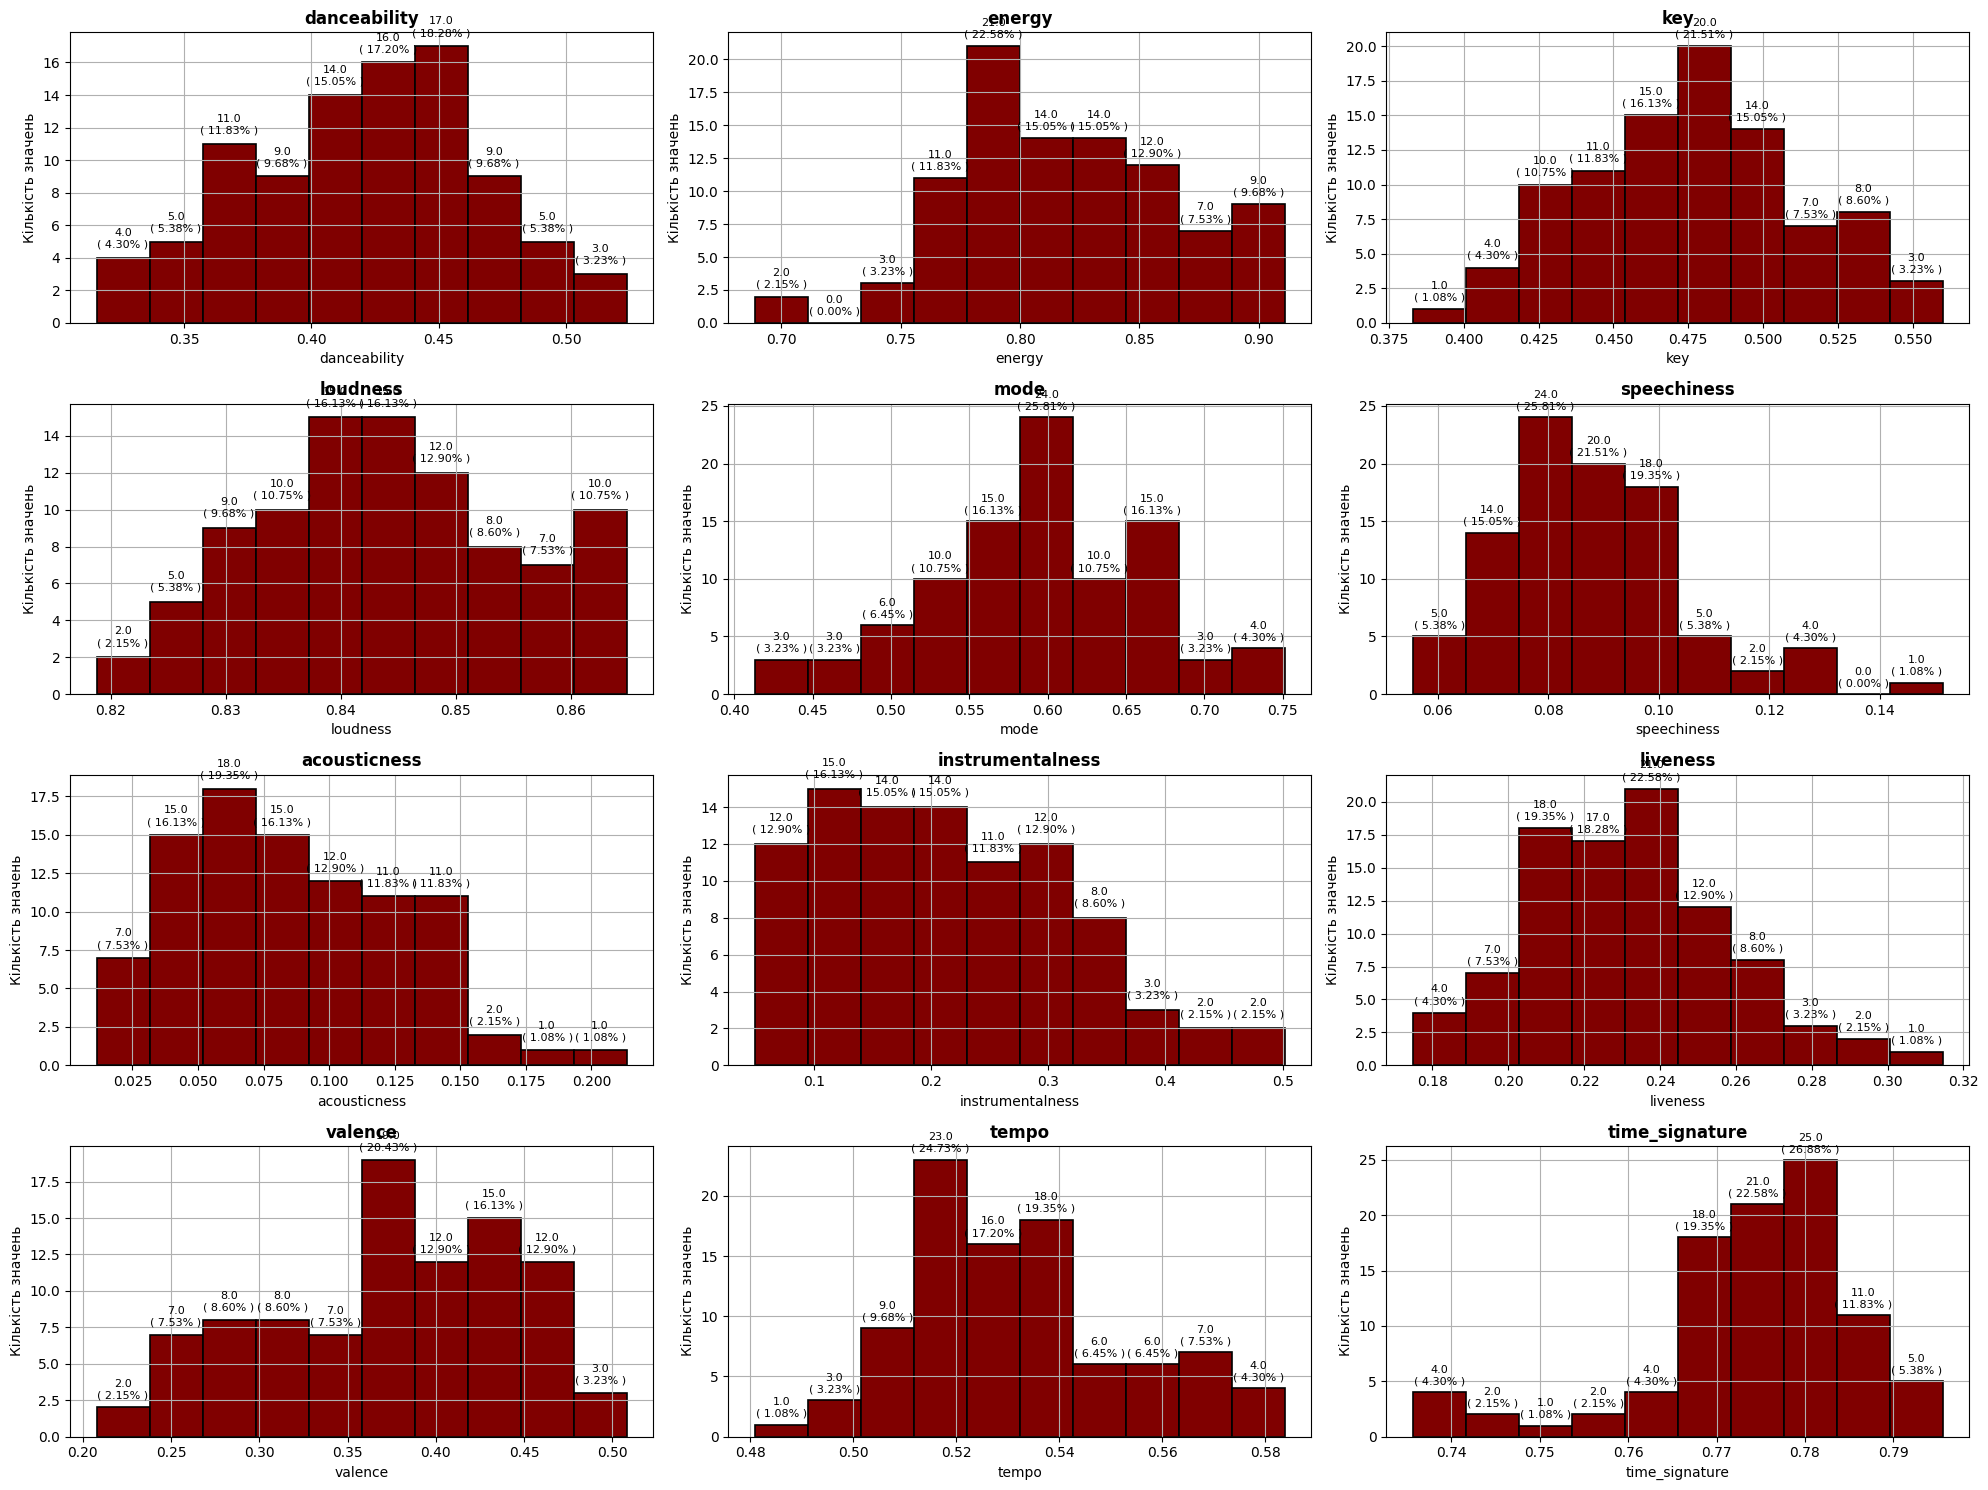

In [58]:
plot_all_features(data=expl_data)

## **Переглянемо четвертий кластер**

In [59]:
expl_data = df_clusters_final[df_clusters_final['cluster_k_5'] == 3]

In [60]:
expl_data.sample(4)

danceability    energy       key  \
2078b23380f2a80615fb9829621f7dc6cc6c7a82      0.546797  0.766292  0.507290   
00d7dede8a10a03ea0b2d4a08449a9776d414923      0.482621  0.682982  0.477122   
3d9f85b481d7fdf51125d99b6b919f787095b56e      0.521973  0.676214  0.437500   
4a1af7eb442b43b622bd8f2d3c4fab76f74cf087      0.481247  0.669234  0.451537   

                                          loudness      mode  speechiness  \
2078b23380f2a80615fb9829621f7dc6cc6c7a82  0.845797  0.570755     0.079074   
00d7dede8a10a03ea0b2d4a08449a9776d414923  0.823498  0.782705     0.053906   
3d9f85b481d7fdf51125d99b6b919f787095b56e  0.821625  0.633929     0.091196   
4a1af7eb442b43b622bd8f2d3c4fab76f74cf087  0.803305  0.724265     0.067023   

                                          acousticness  instrumentalness  \
2078b23380f2a80615fb9829621f7dc6cc6c7a82      0.108784          0.102738   
00d7dede8a10a03ea0b2d4a08449a9776d414923      0.241422          0.125866   
3d9f85b481d7fdf51125d99b6b919f787095b56e      0.220145          0.166188   
4a1af7eb442b43b622bd8f2d3c4fab76f74cf087      0.218490          0.164420   

                                          liveness   valence     tempo  \
2078b23380f2a80615fb9829621f7dc6cc6c7a82  0.208586  0.515130  0.524810   
00d7dede8a10a03ea0b2d4a08449a9776d414923  0.189337  0.442712  0.516260   
3d9f85b481d7fdf51125d99b6b919f787095b56e  0.187026  0.481062  0.542846   
4a1af7eb442b43b622bd8f2d3c4fab76f74cf087  0.212350  0.475097  0.531347   

                                          time_signature  cluster_k_5  
2078b23380f2a80615fb9829621f7dc6cc6c7a82        0.796226            3  
00d7dede8a10a03ea0b2d4a08449a9776d414923        0.776497            3  
3d9f85b481d7fdf51125d99b6b919f787095b56e        0.766071            3  
4a1af7eb442b43b622bd8f2d3c4fab76f74cf087        0.775000            3

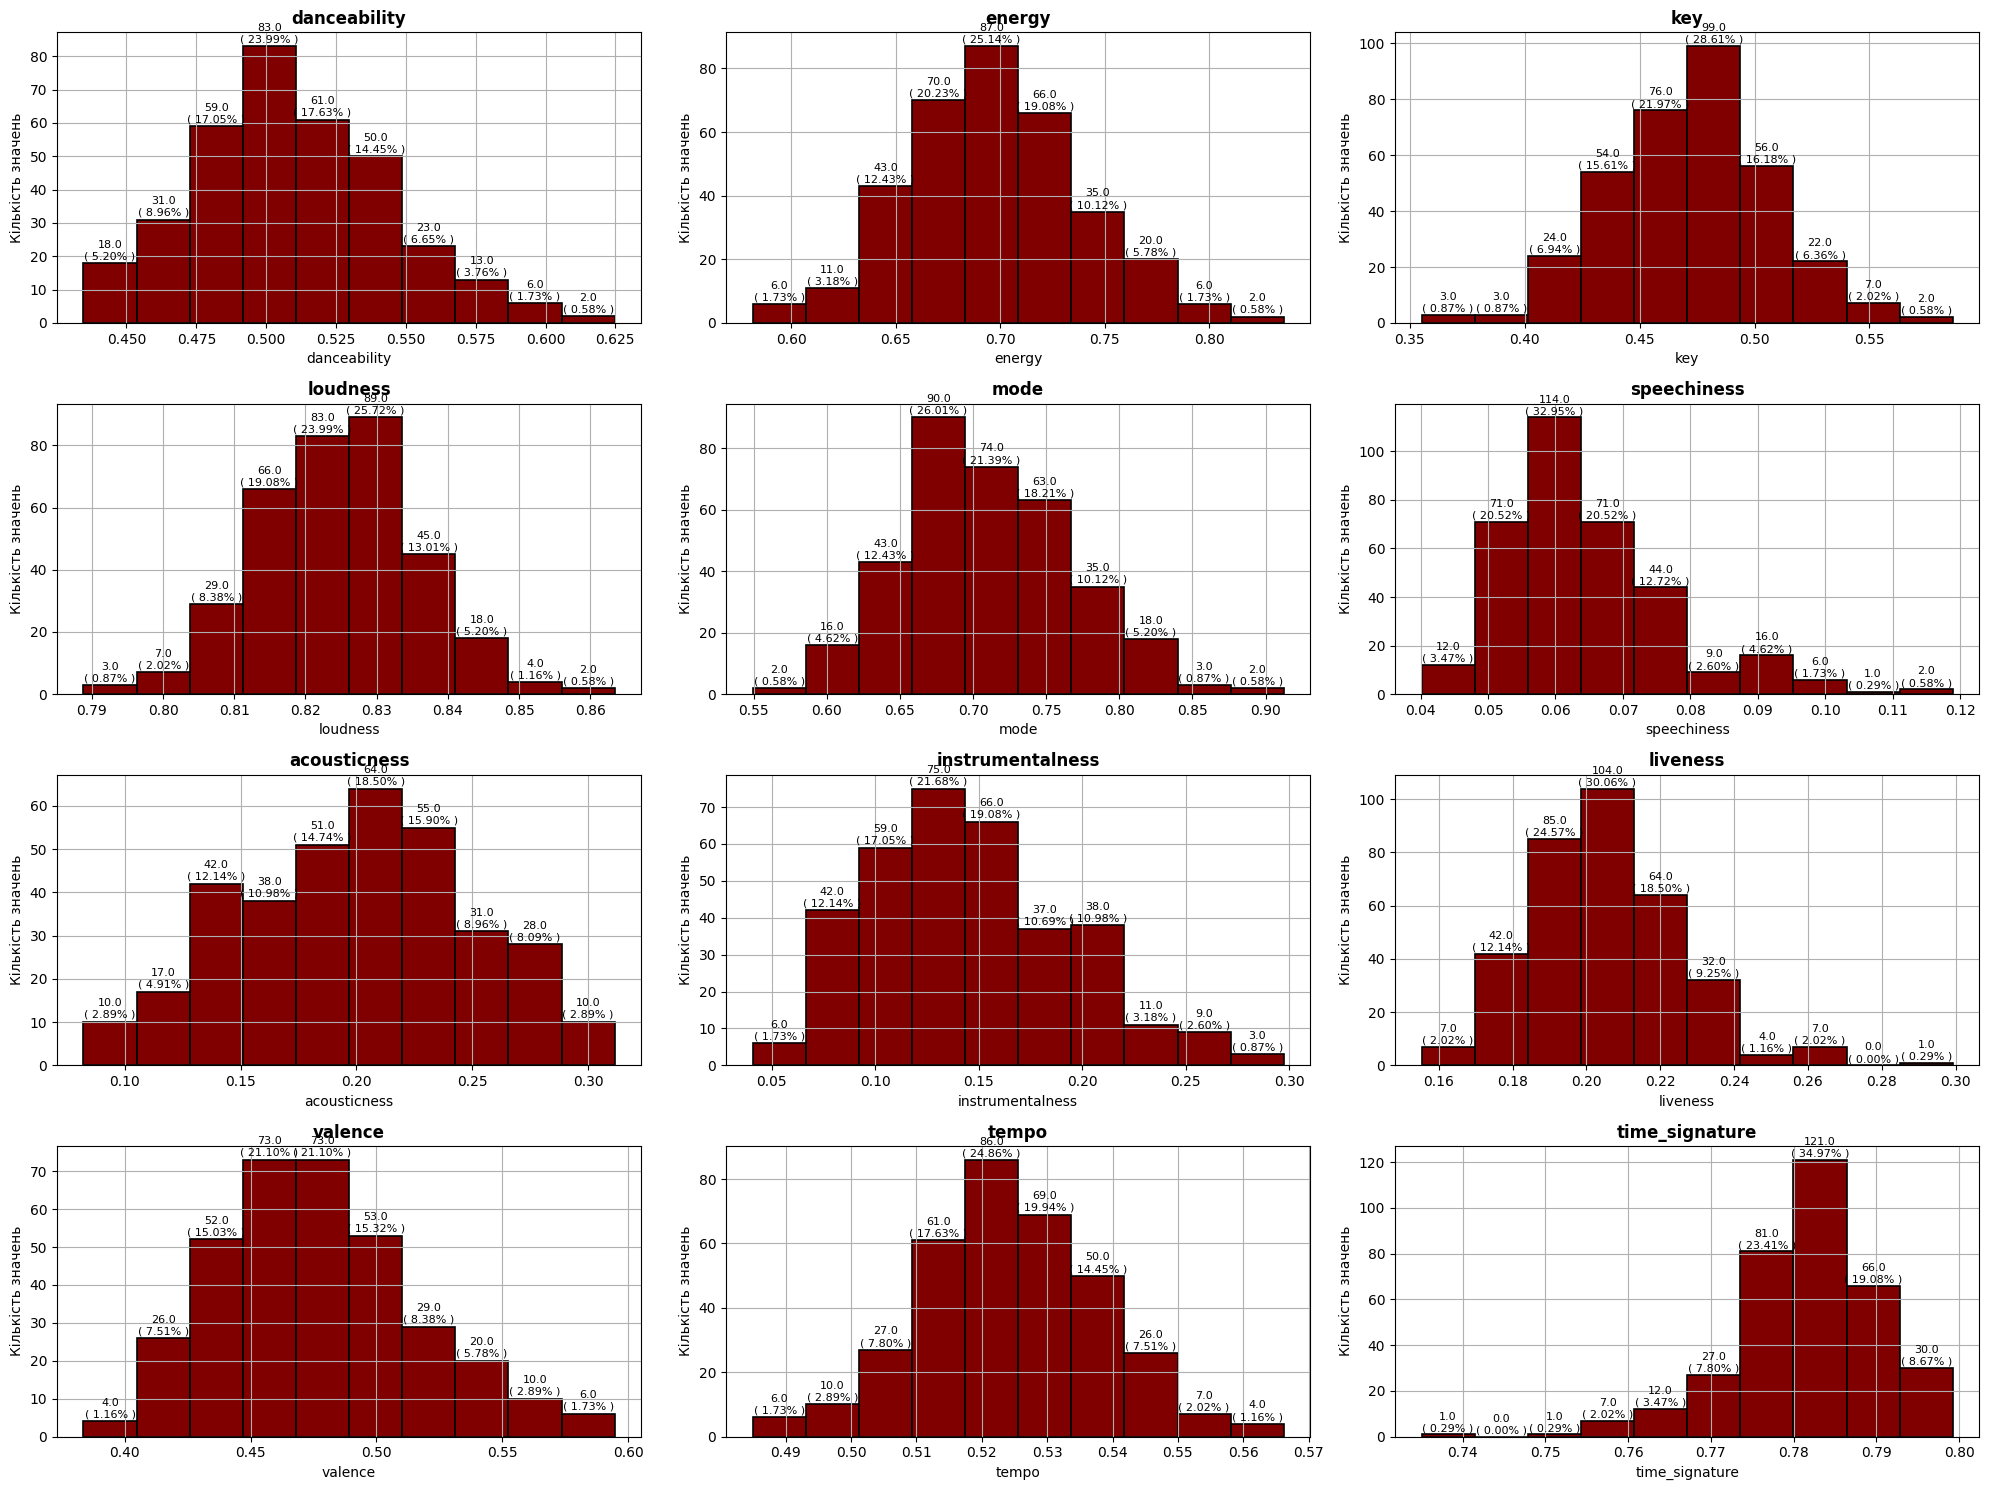

In [61]:
plot_all_features(data=expl_data)

## **Переглянемо п'ятий кластер**

In [62]:
expl_data = df_clusters_final[df_clusters_final['cluster_k_5'] == 4]

In [63]:
expl_data.sample(4)

danceability    energy       key  \
e81eeaa58d47394f516f6062c9fb6492305682c9      0.527354  0.649435  0.457809   
acbc5603196b2c5b1617c7c1cc9b6bb47966f9fc      0.584630  0.609845  0.509328   
f3825861e5575cf4206f883630754fa30c80721e      0.494917  0.594233  0.521189   
358a2d28f22636ae3bbd86a2958dc45fb771561e      0.554532  0.678451  0.484081   

                                          loudness      mode  speechiness  \
e81eeaa58d47394f516f6062c9fb6492305682c9  0.801883  0.605128     0.080638   
acbc5603196b2c5b1617c7c1cc9b6bb47966f9fc  0.797859  0.537459     0.070166   
f3825861e5575cf4206f883630754fa30c80721e  0.786139  0.548872     0.056486   
358a2d28f22636ae3bbd86a2958dc45fb771561e  0.800143  0.569620     0.062806   

                                          acousticness  instrumentalness  \
e81eeaa58d47394f516f6062c9fb6492305682c9      0.278335          0.467174   
acbc5603196b2c5b1617c7c1cc9b6bb47966f9fc      0.285215          0.345497   
f3825861e5575cf4206f883630754fa30c80721e      0.257202          0.529557   
358a2d28f22636ae3bbd86a2958dc45fb771561e      0.190561          0.439223   

                                          liveness   valence     tempo  \
e81eeaa58d47394f516f6062c9fb6492305682c9  0.192315  0.382946  0.512424   
acbc5603196b2c5b1617c7c1cc9b6bb47966f9fc  0.170426  0.471482  0.504961   
f3825861e5575cf4206f883630754fa30c80721e  0.202953  0.356264  0.491724   
358a2d28f22636ae3bbd86a2958dc45fb771561e  0.217088  0.415985  0.514329   

                                          time_signature  cluster_k_5  
e81eeaa58d47394f516f6062c9fb6492305682c9        0.783590            4  
acbc5603196b2c5b1617c7c1cc9b6bb47966f9fc        0.788274            4  
f3825861e5575cf4206f883630754fa30c80721e        0.779699            4  
358a2d28f22636ae3bbd86a2958dc45fb771561e        0.783122            4

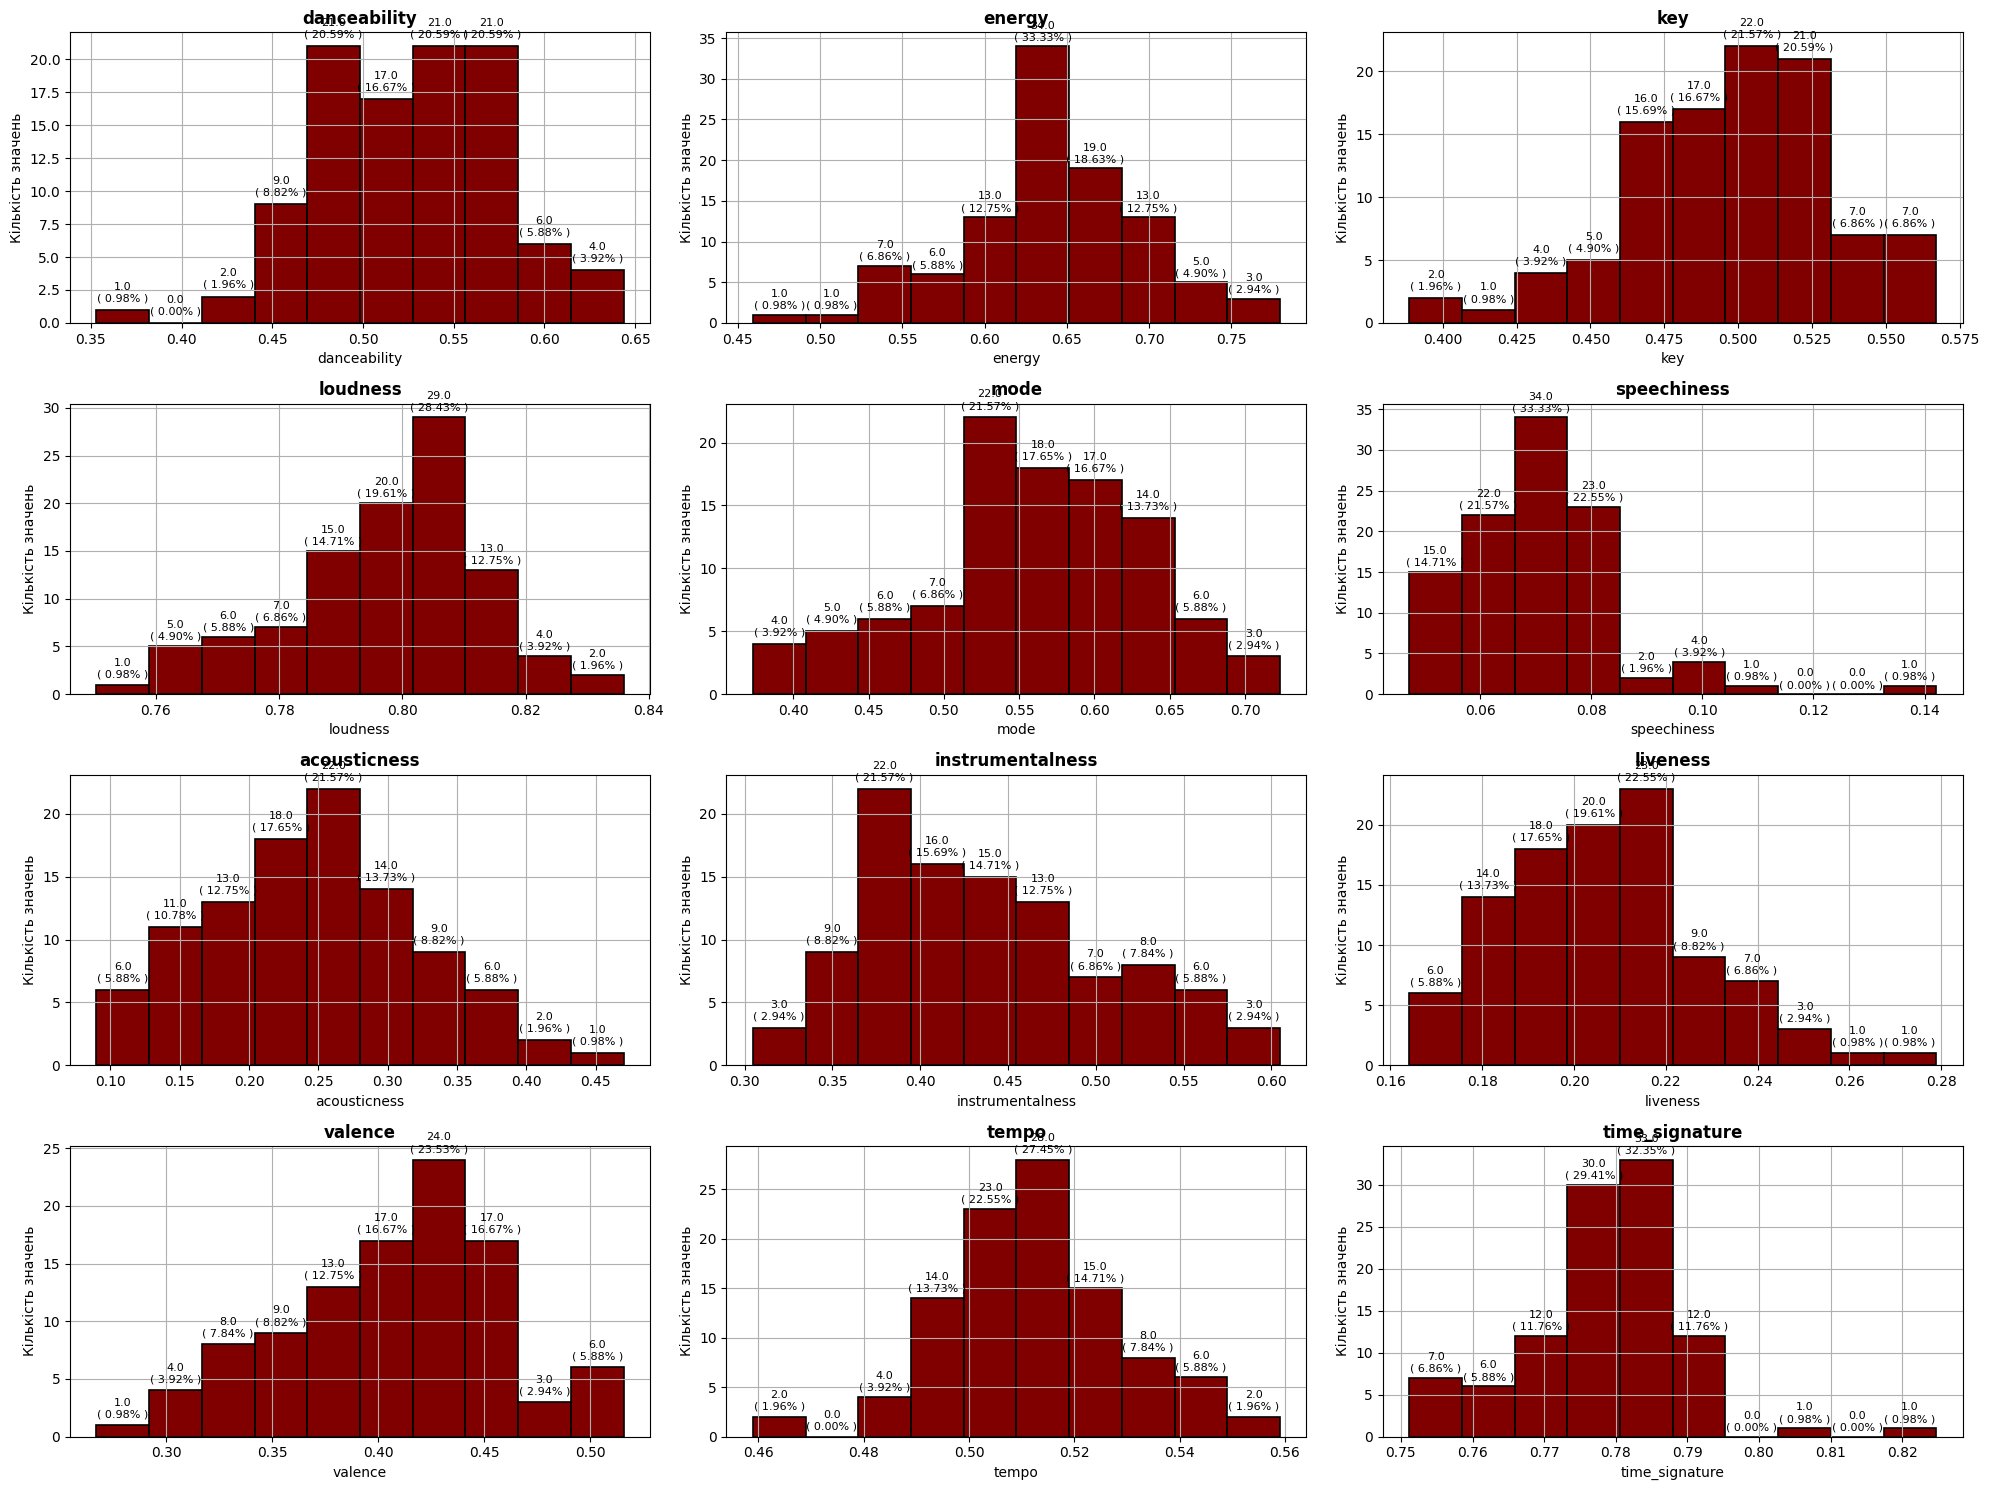

In [64]:
plot_all_features(data=expl_data)

# **Виведемо порівнння фіч кожного кластера**

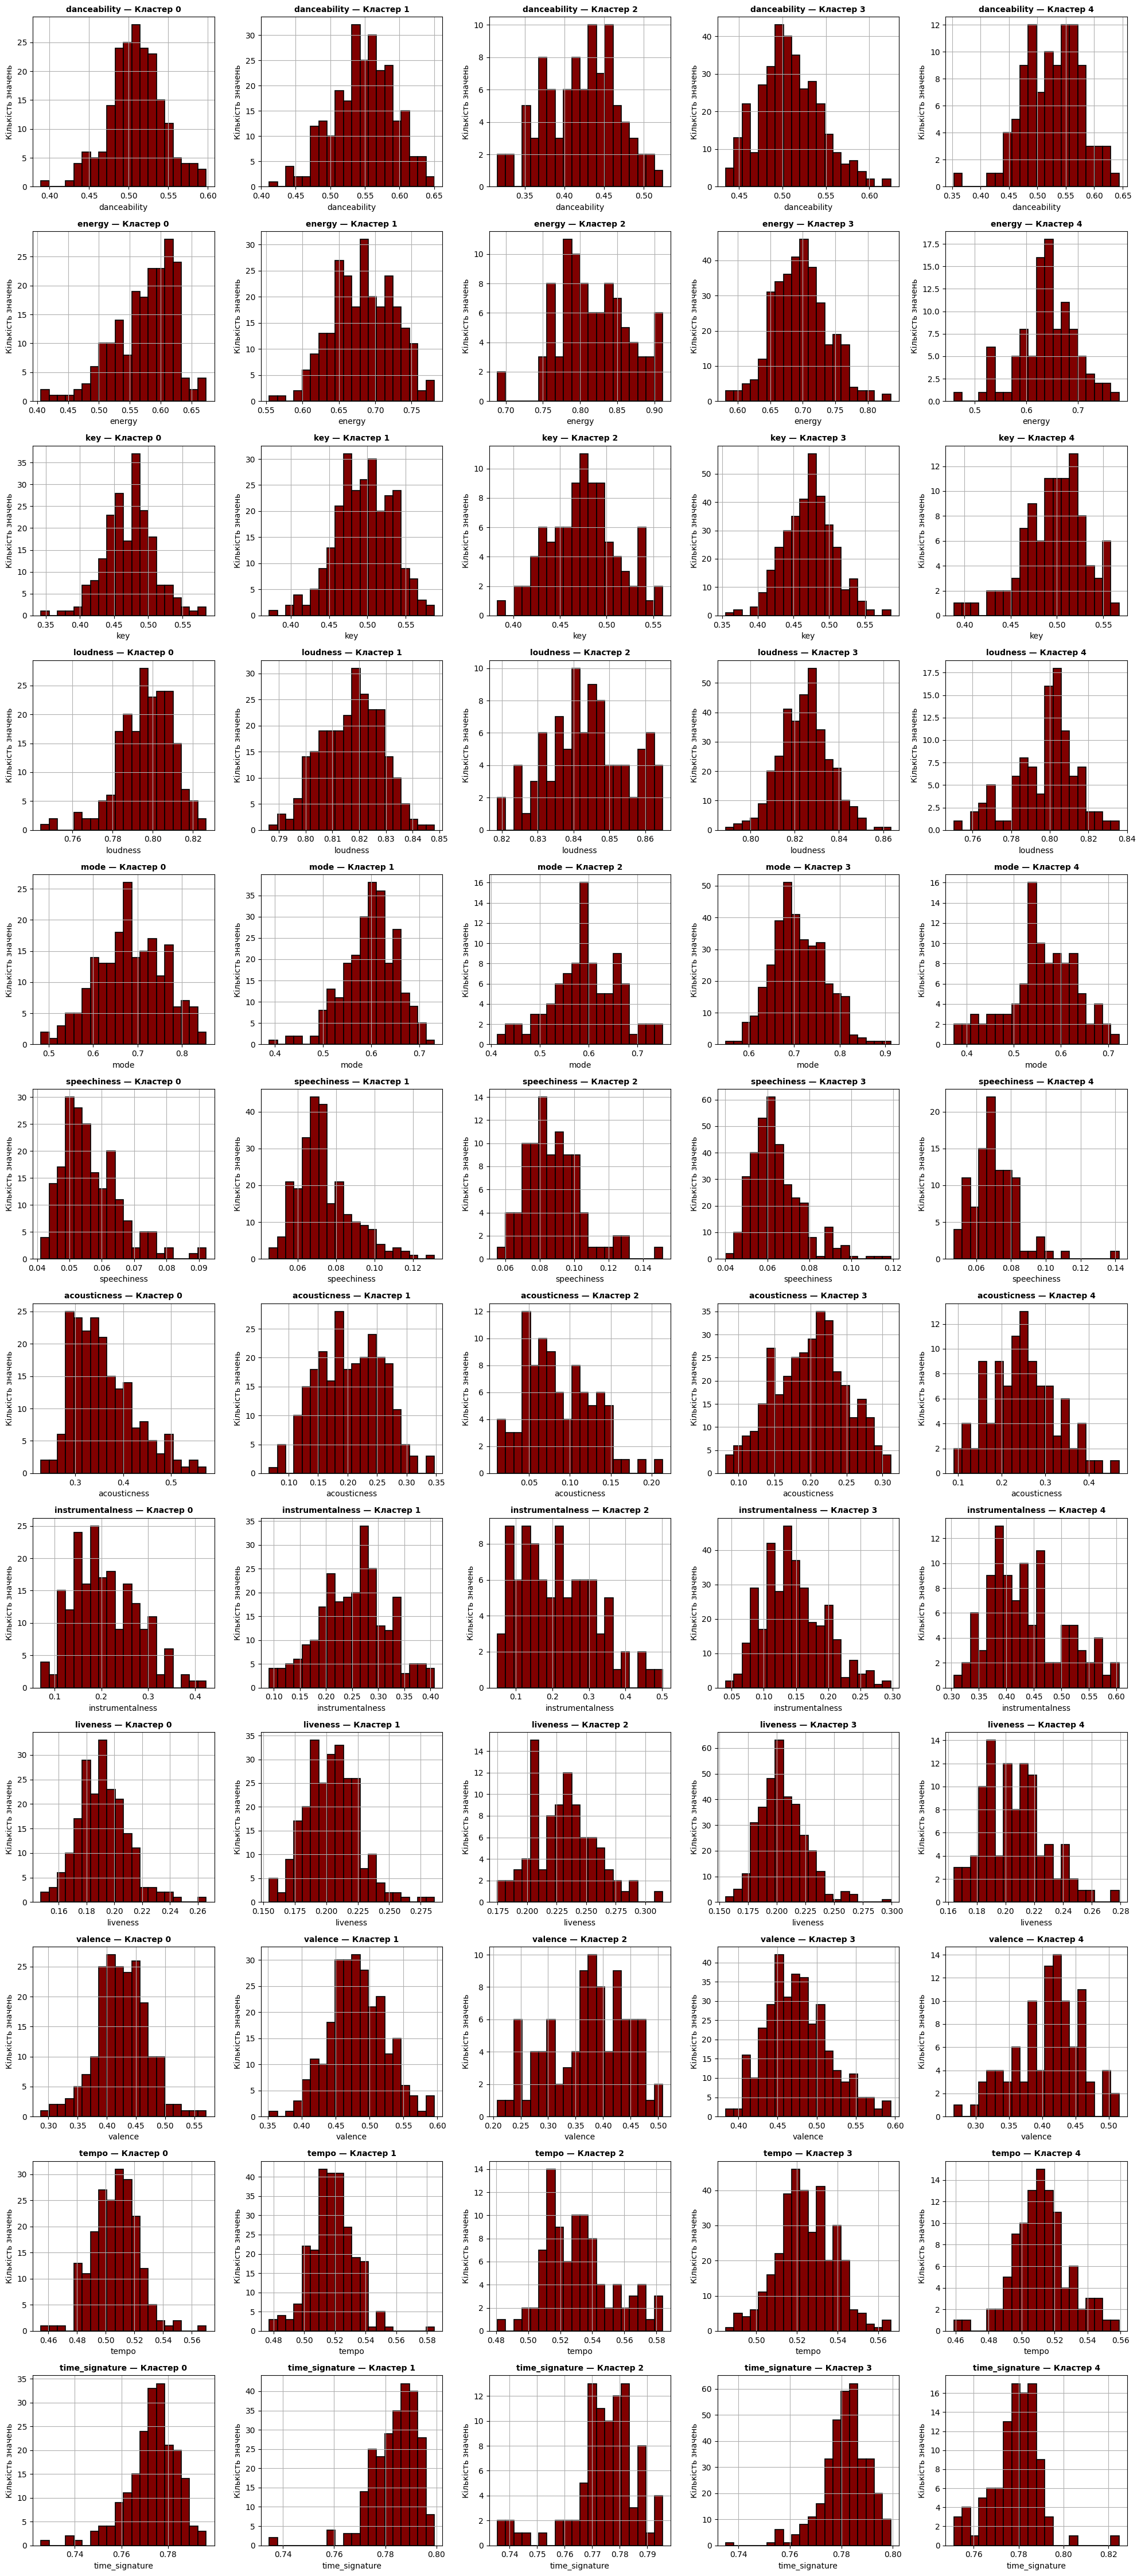

In [65]:
plot_features_comparisson(data=df_clusters_final, cluster_column_name='cluster_k_5', features=features)

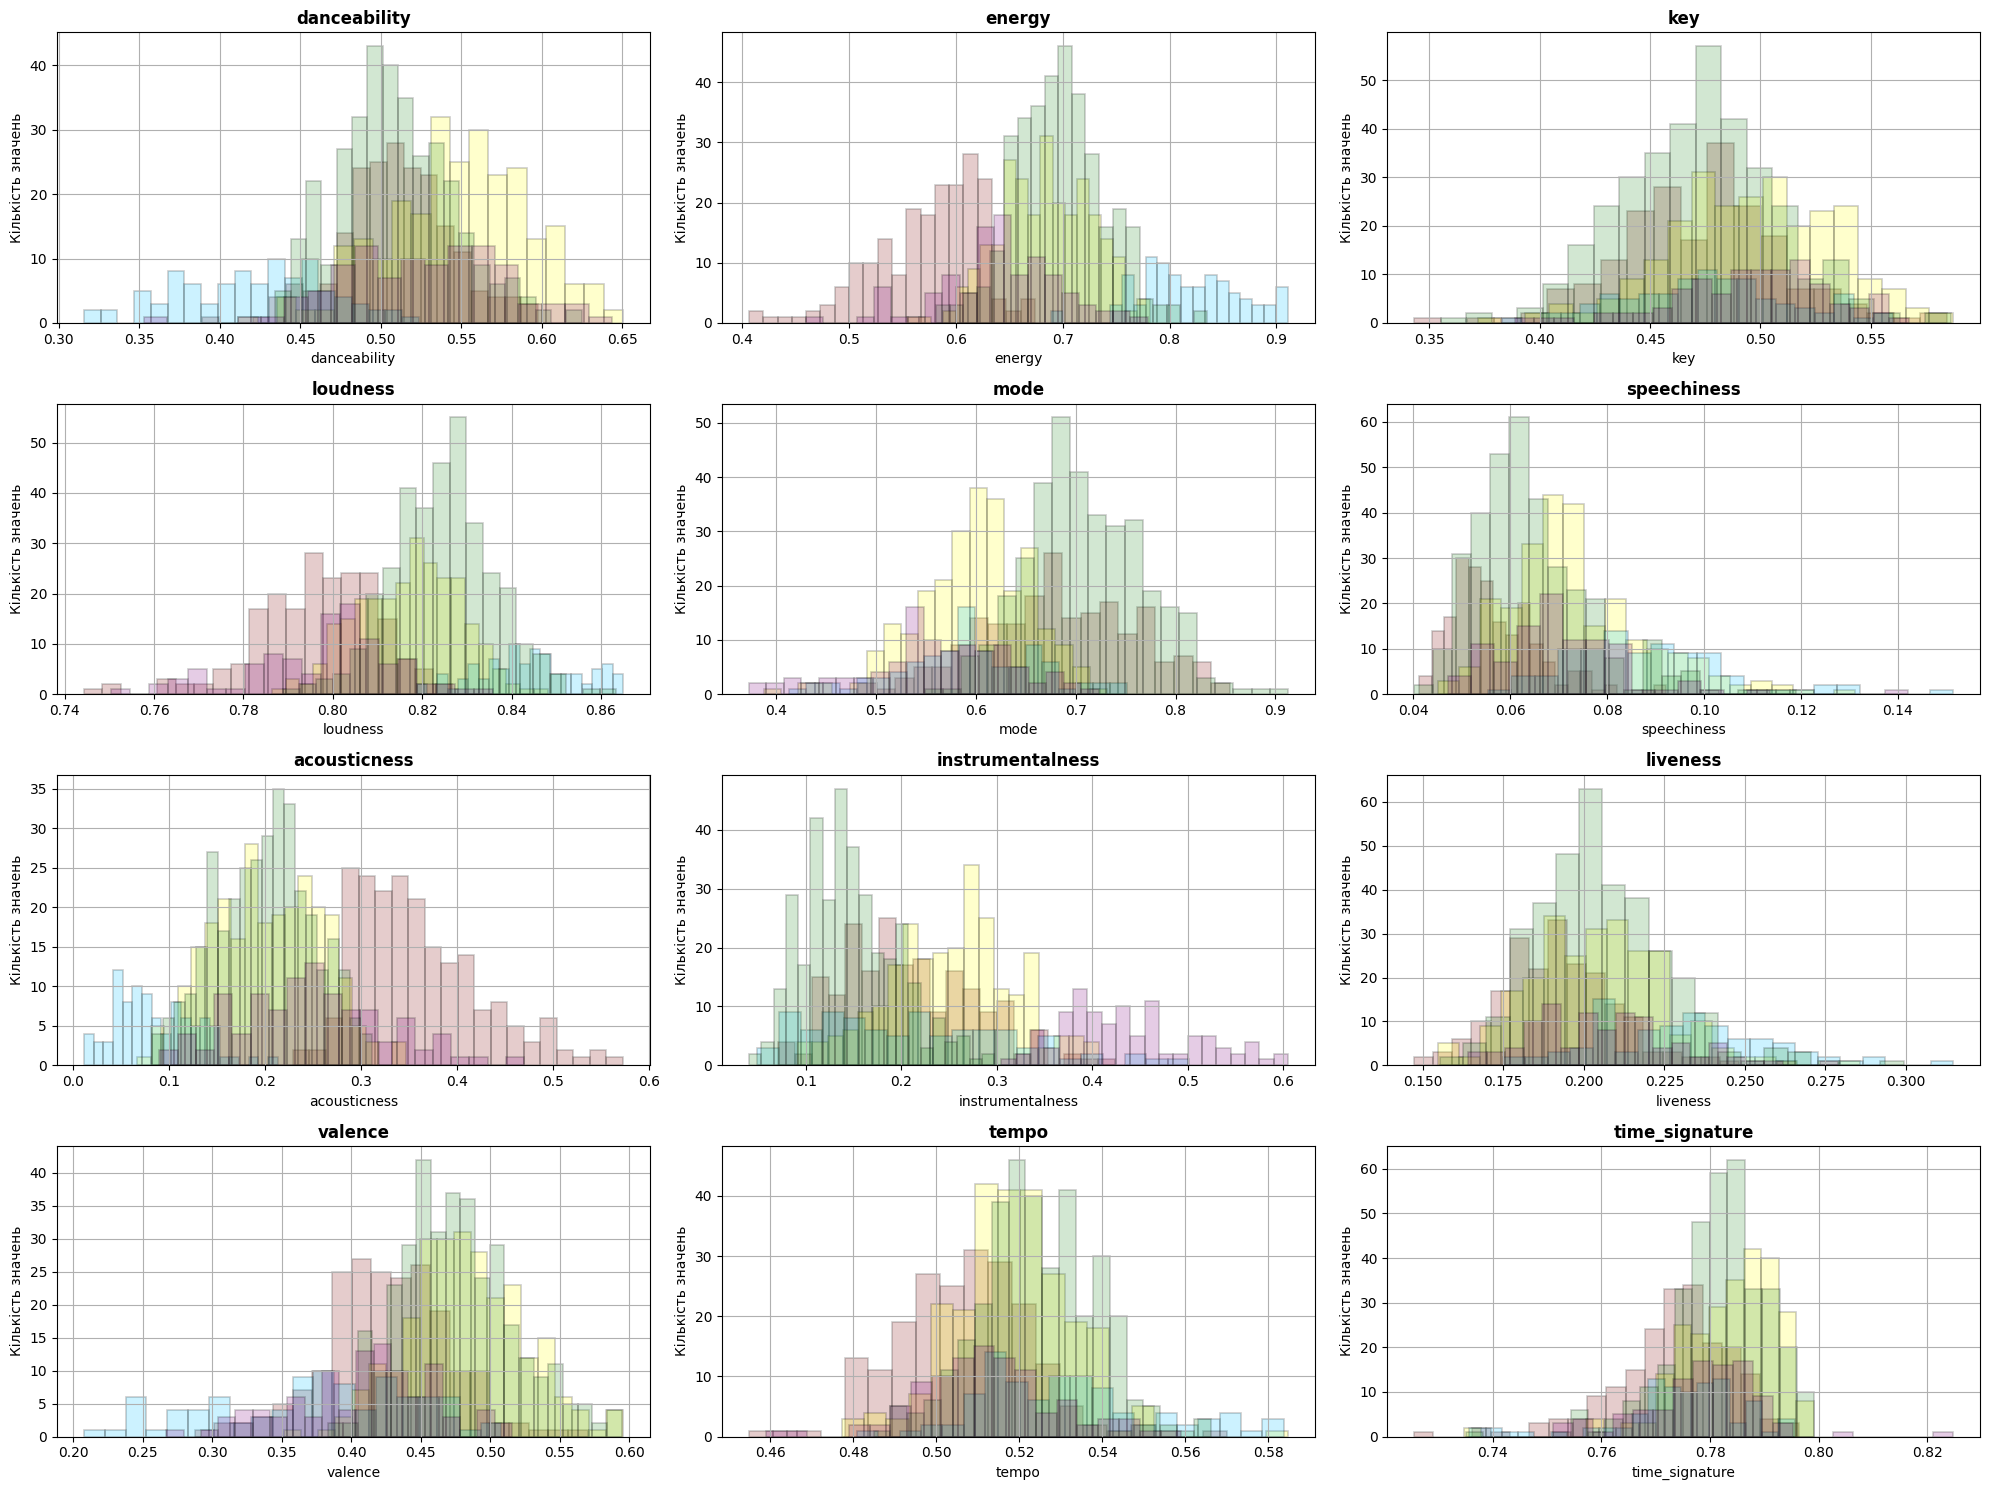

In [66]:
plot_features_comparisson_overlaping(data=df_clusters_final, cluster_column_name='cluster_k_5', features=features)

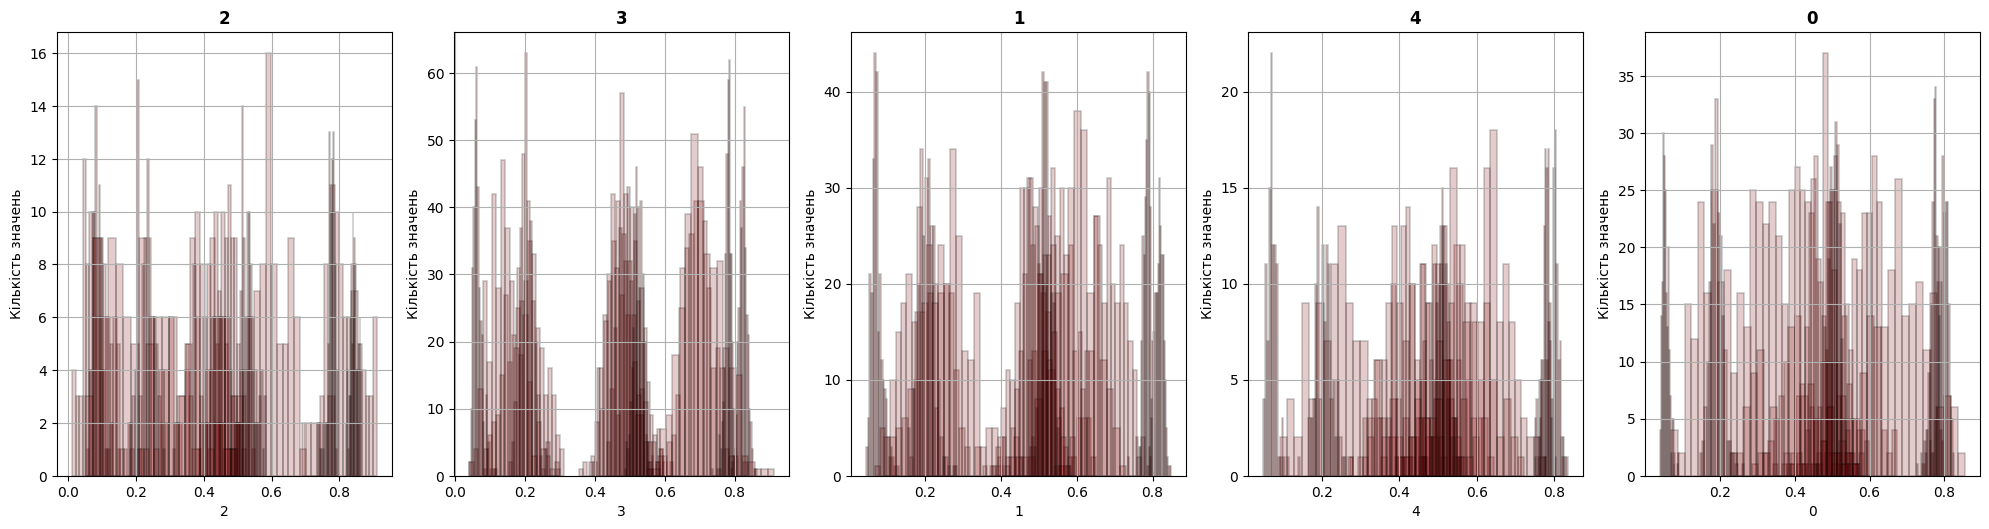

In [67]:
plot_clusters_overlaping(data=df_clusters_final, cluster_column_name='cluster_k_5', features=features)

In [68]:
df_clusters_final.index.name = 'user_id'
df_clusters_final.to_csv('User_Profiles_clusterized.csv')